# Zero to Hero

## 1.04 Transformado (innecesariamente) las variables

El objetivo de esta sección es analizar el efecto que tiene sobre el arbol de decision
* Variables Colineales
* Normalizacion de Variables
* Transformada logarítmica
* Outliers

In [8]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("~/dataScience/maestriaDC/2021/DM_en_EyF_2021cuat2/")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,695894,37.2,1230467,65.8,1230467,65.8
Vcells,1325206,10.2,100340647,765.6,125412599,956.9


In [9]:
dataset <- fread("./datasetsOri/paquete_premium_202009.csv")   #cargo el dataset

Warning message:
“cex and tweak both specified, applying both”


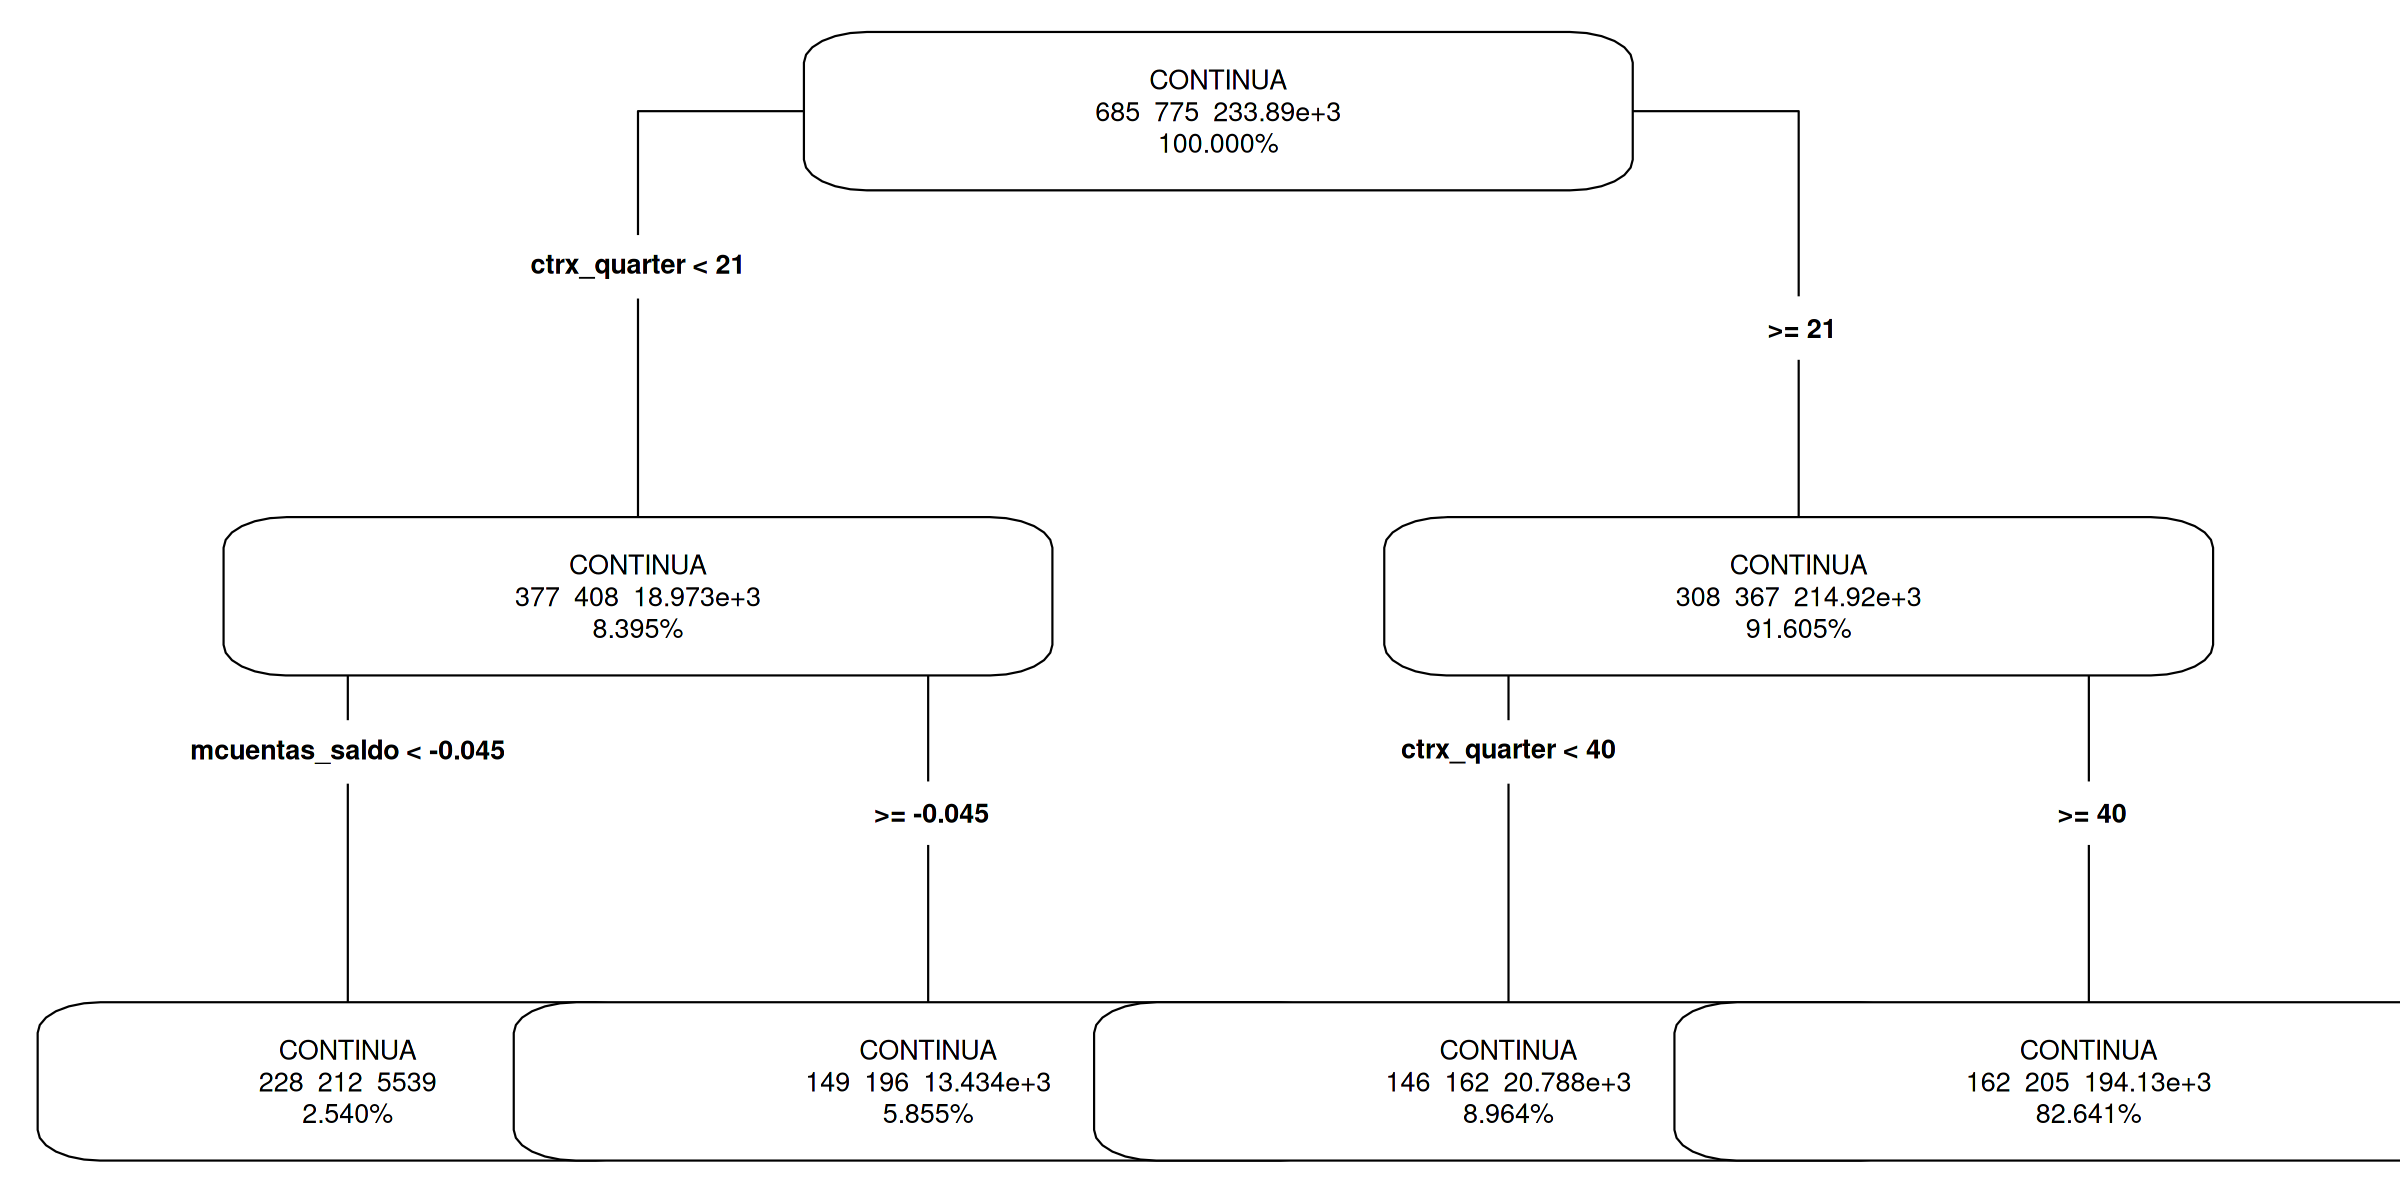

In [10]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )


#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

La variable mas importante que aparece es ctrx_quarter

### variables colineales

agrego al dataset tres variables colineales  con ctrx_quarter

In [11]:
dataset[  , ctrx_quarter_dos    :=  2*ctrx_quarter ]
dataset[  , ctrx_quarter_tres   :=  3*ctrx_quarter ]
dataset[  , ctrx_quarter_cuatro :=  4*ctrx_quarter ]

y vuelvo a correr el arbol de decision

Warning message:
“cex and tweak both specified, applying both”


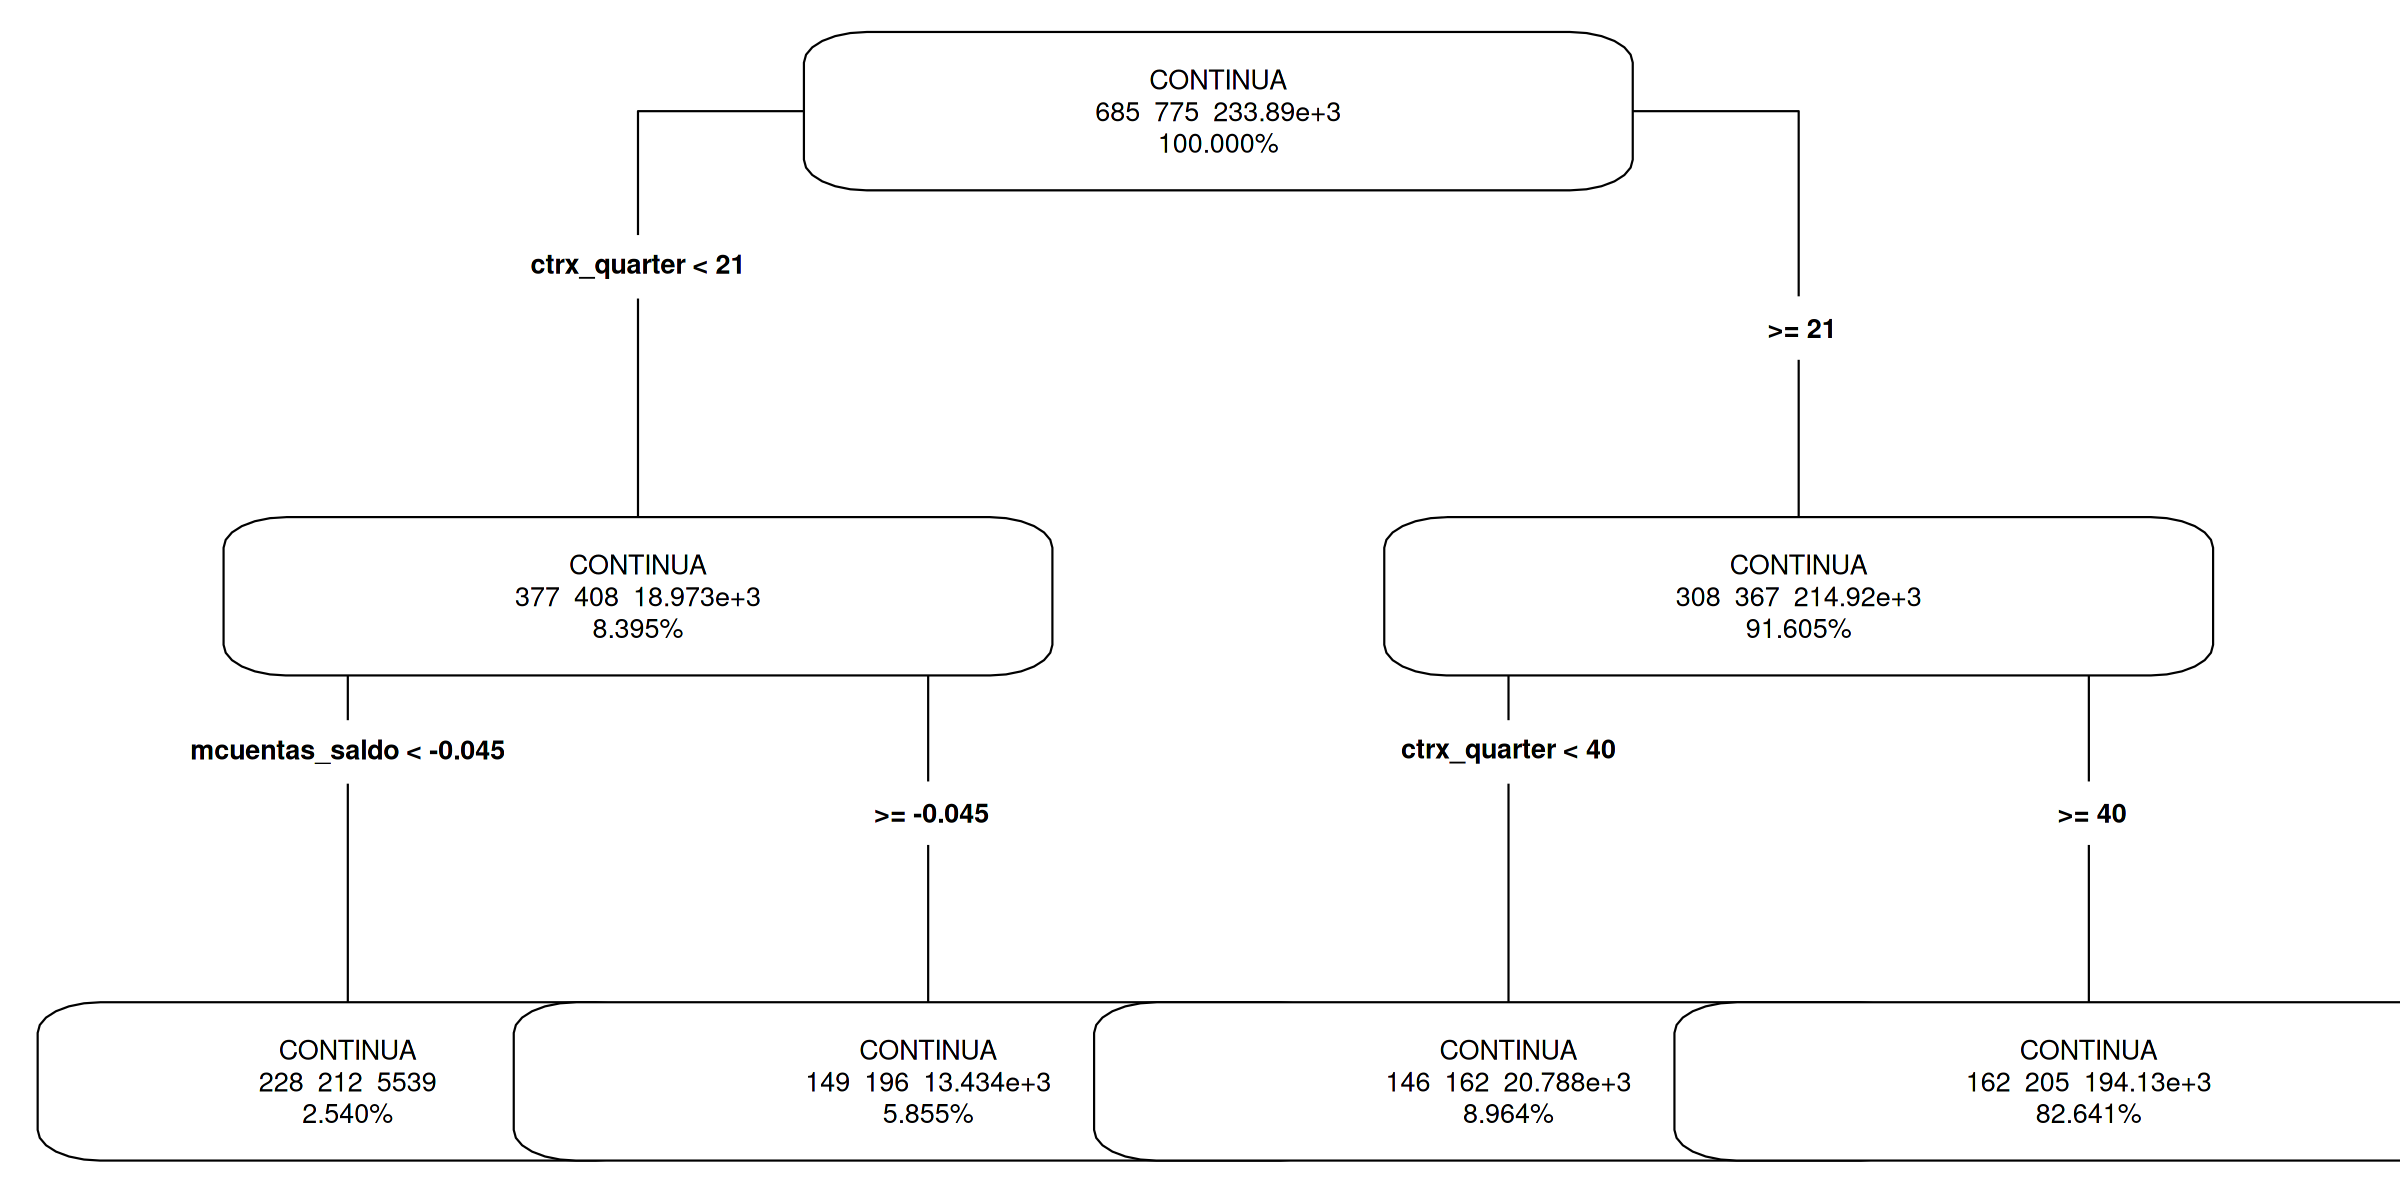

In [12]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las colinearidad de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.

###  Normalizacion de variables

Analizo la variable  ctrx_quarter

In [13]:
min( dataset[ , ctrx_quarter] )

[1] 0

In [14]:
max( dataset[ , ctrx_quarter] )

[1] 2878

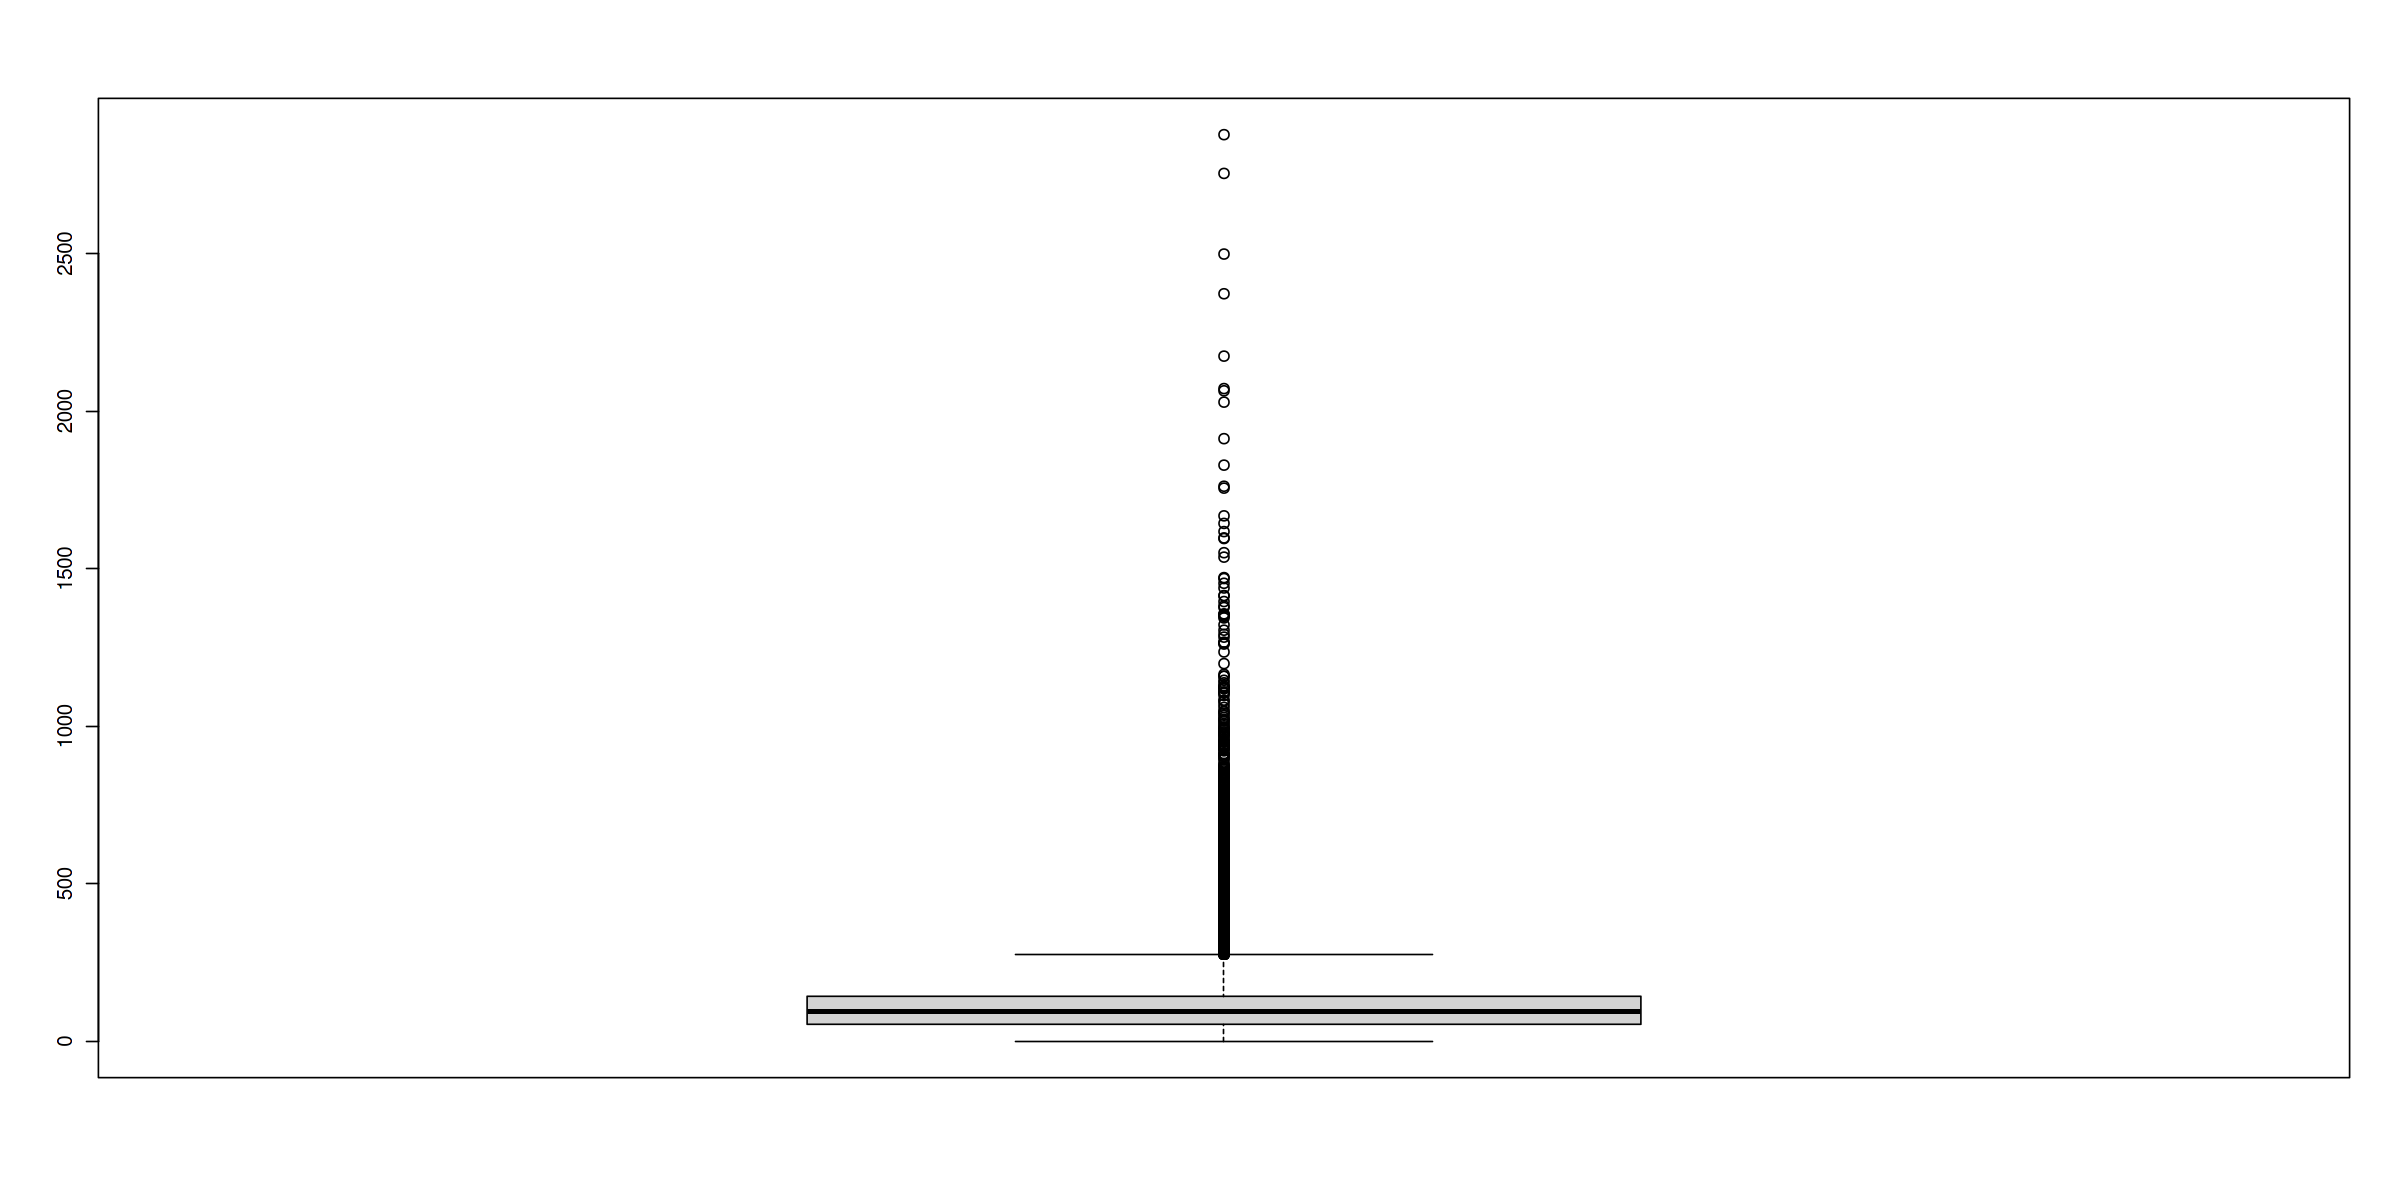

In [15]:
boxplot(  dataset[ , ctrx_quarter])

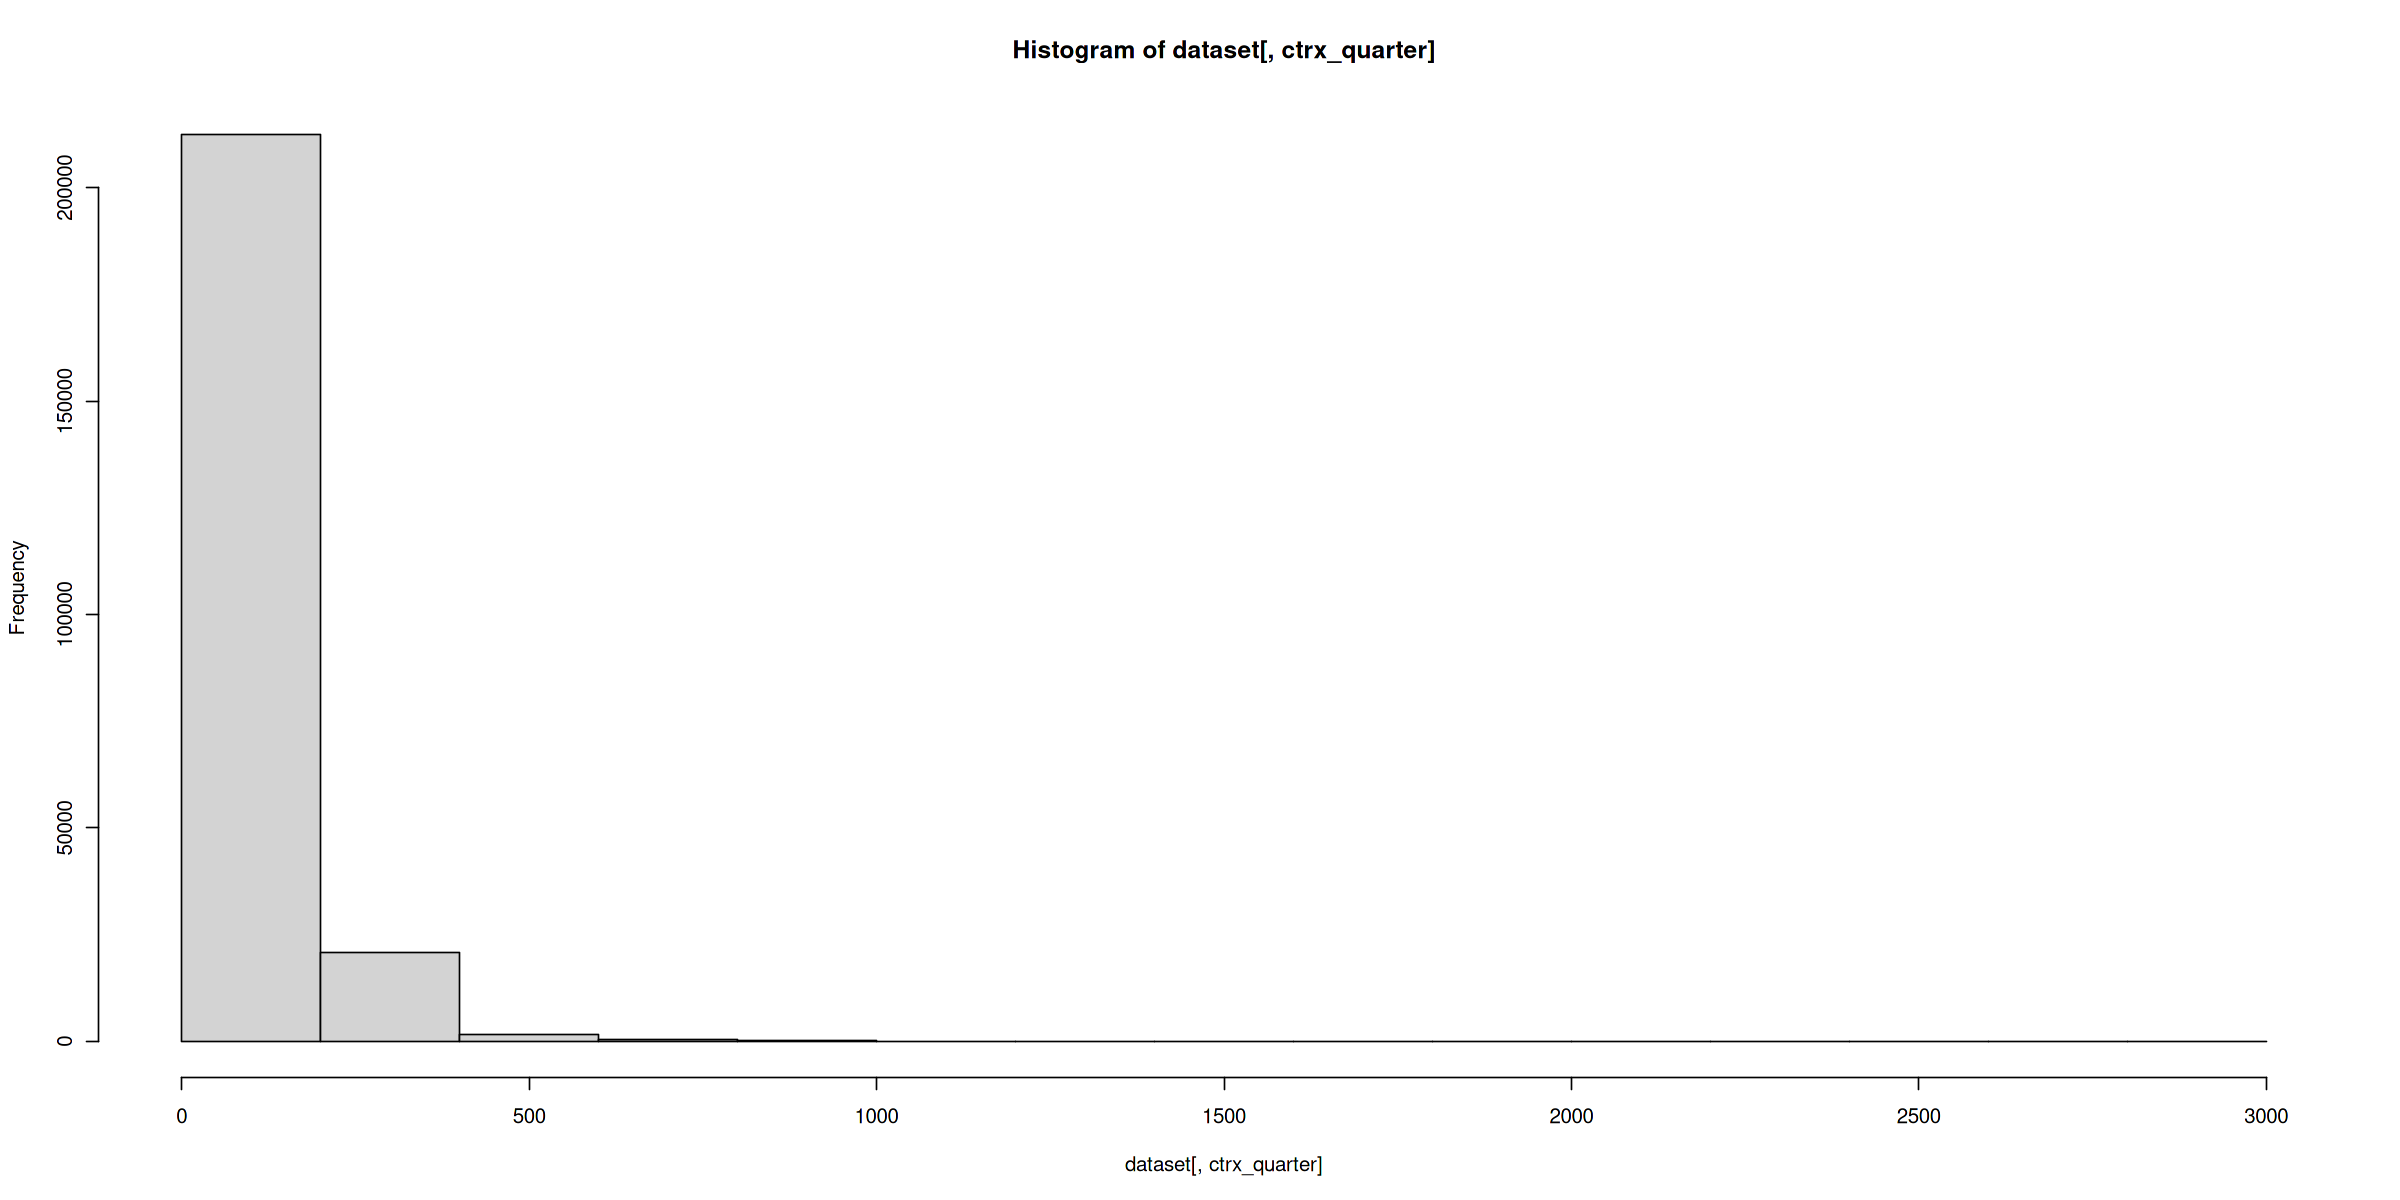

In [16]:
hist( dataset[, ctrx_quarter] )

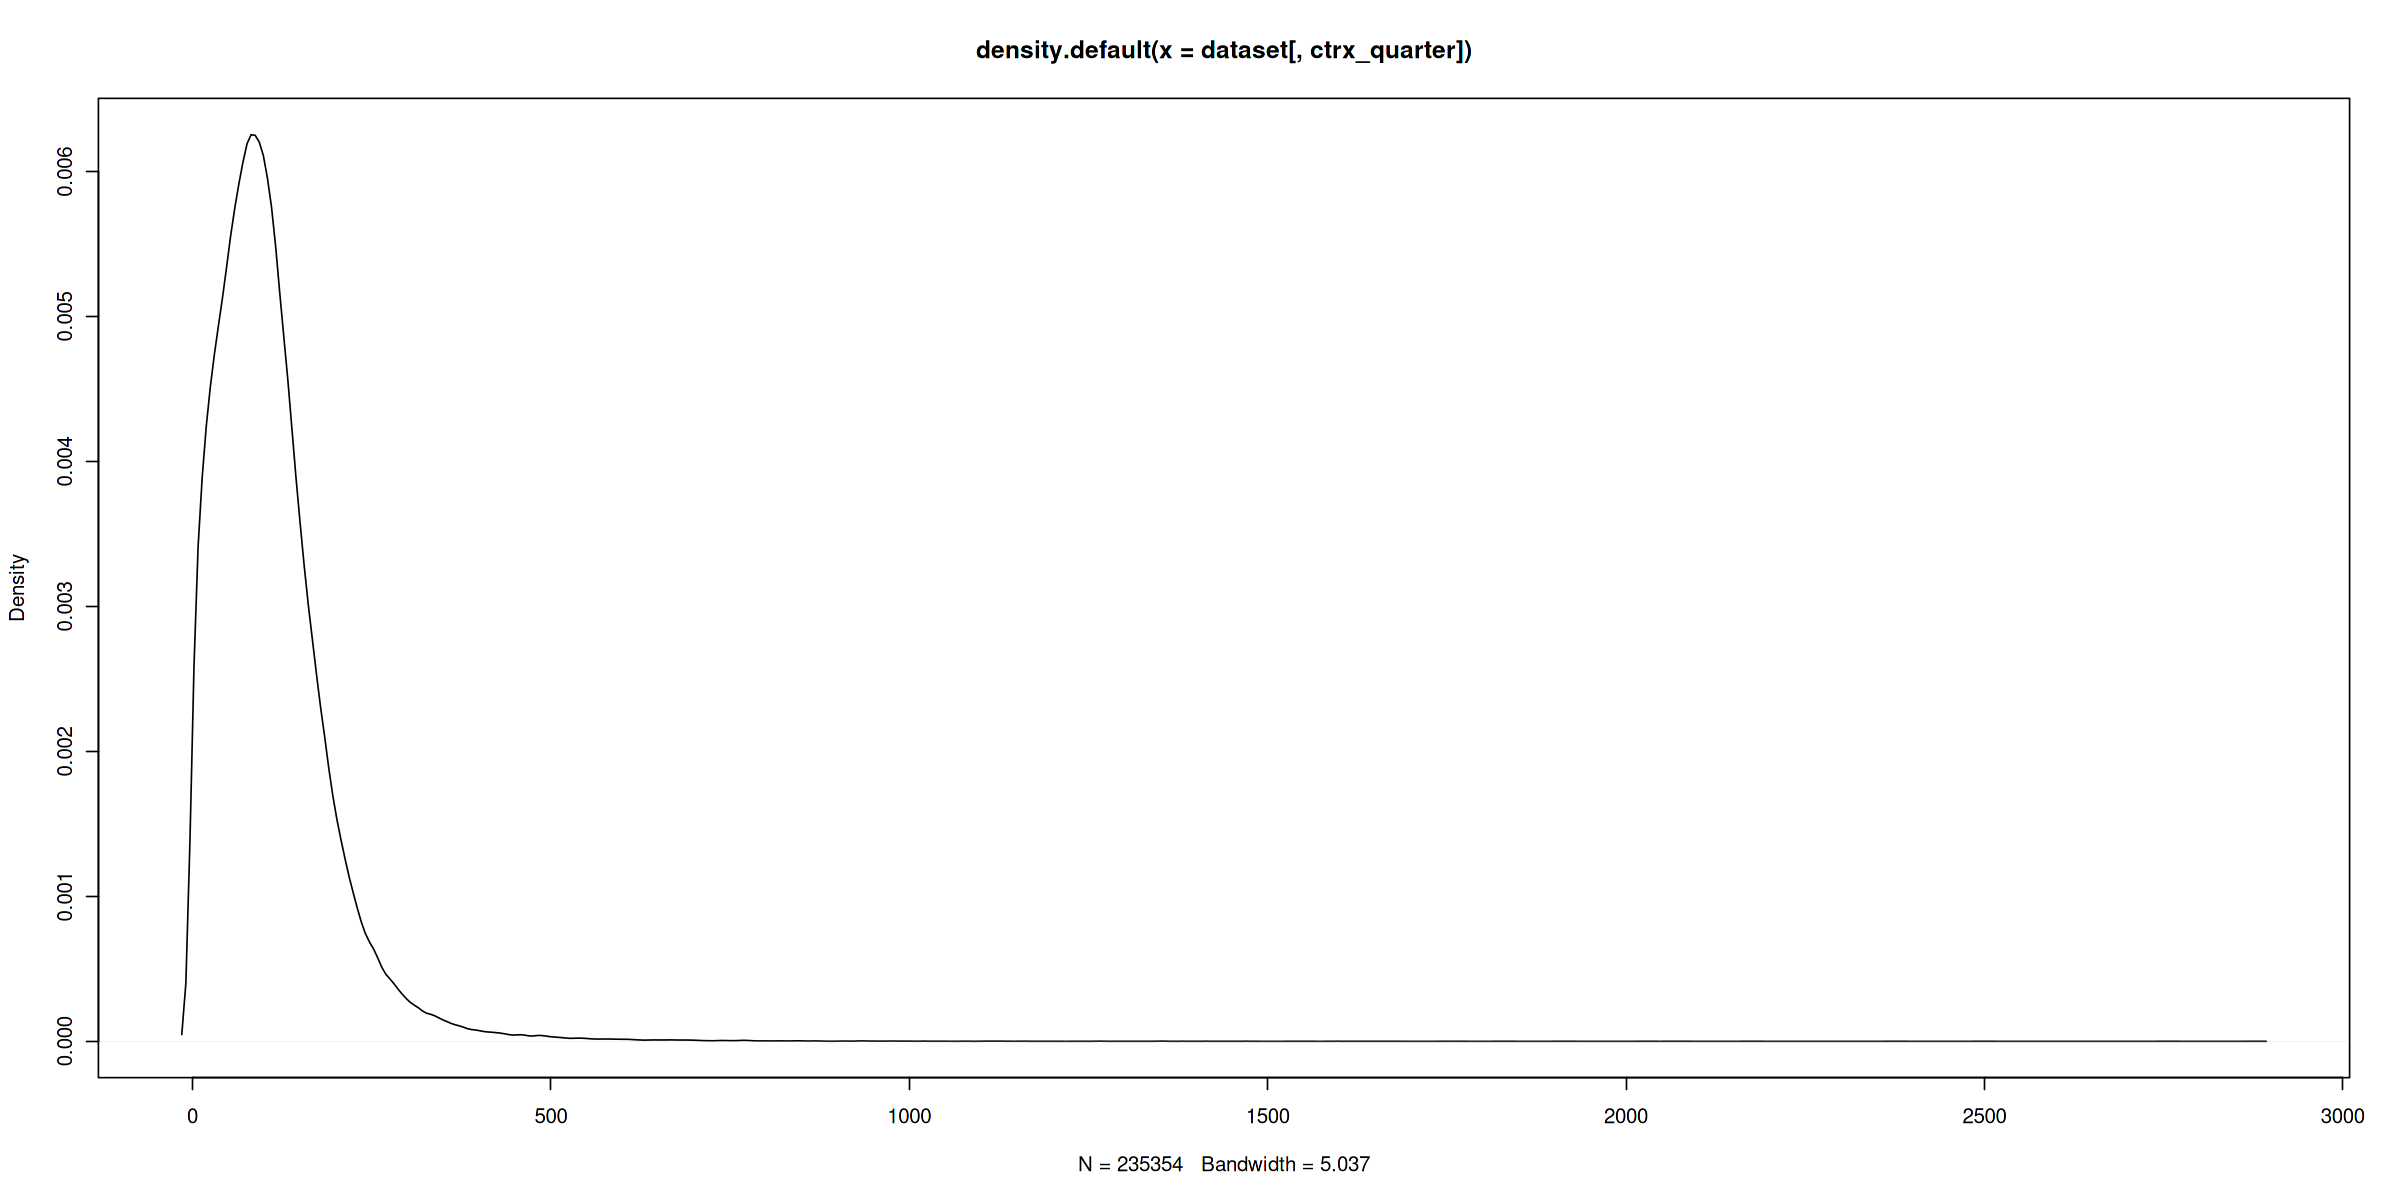

In [17]:
plot( density( dataset[, ctrx_quarter] ) )

Normailzo  ctrx_quarter

In [18]:
dataset[ , ctrx_quarter := scale(ctrx_quarter)]

confirmo que me quedó normalizada

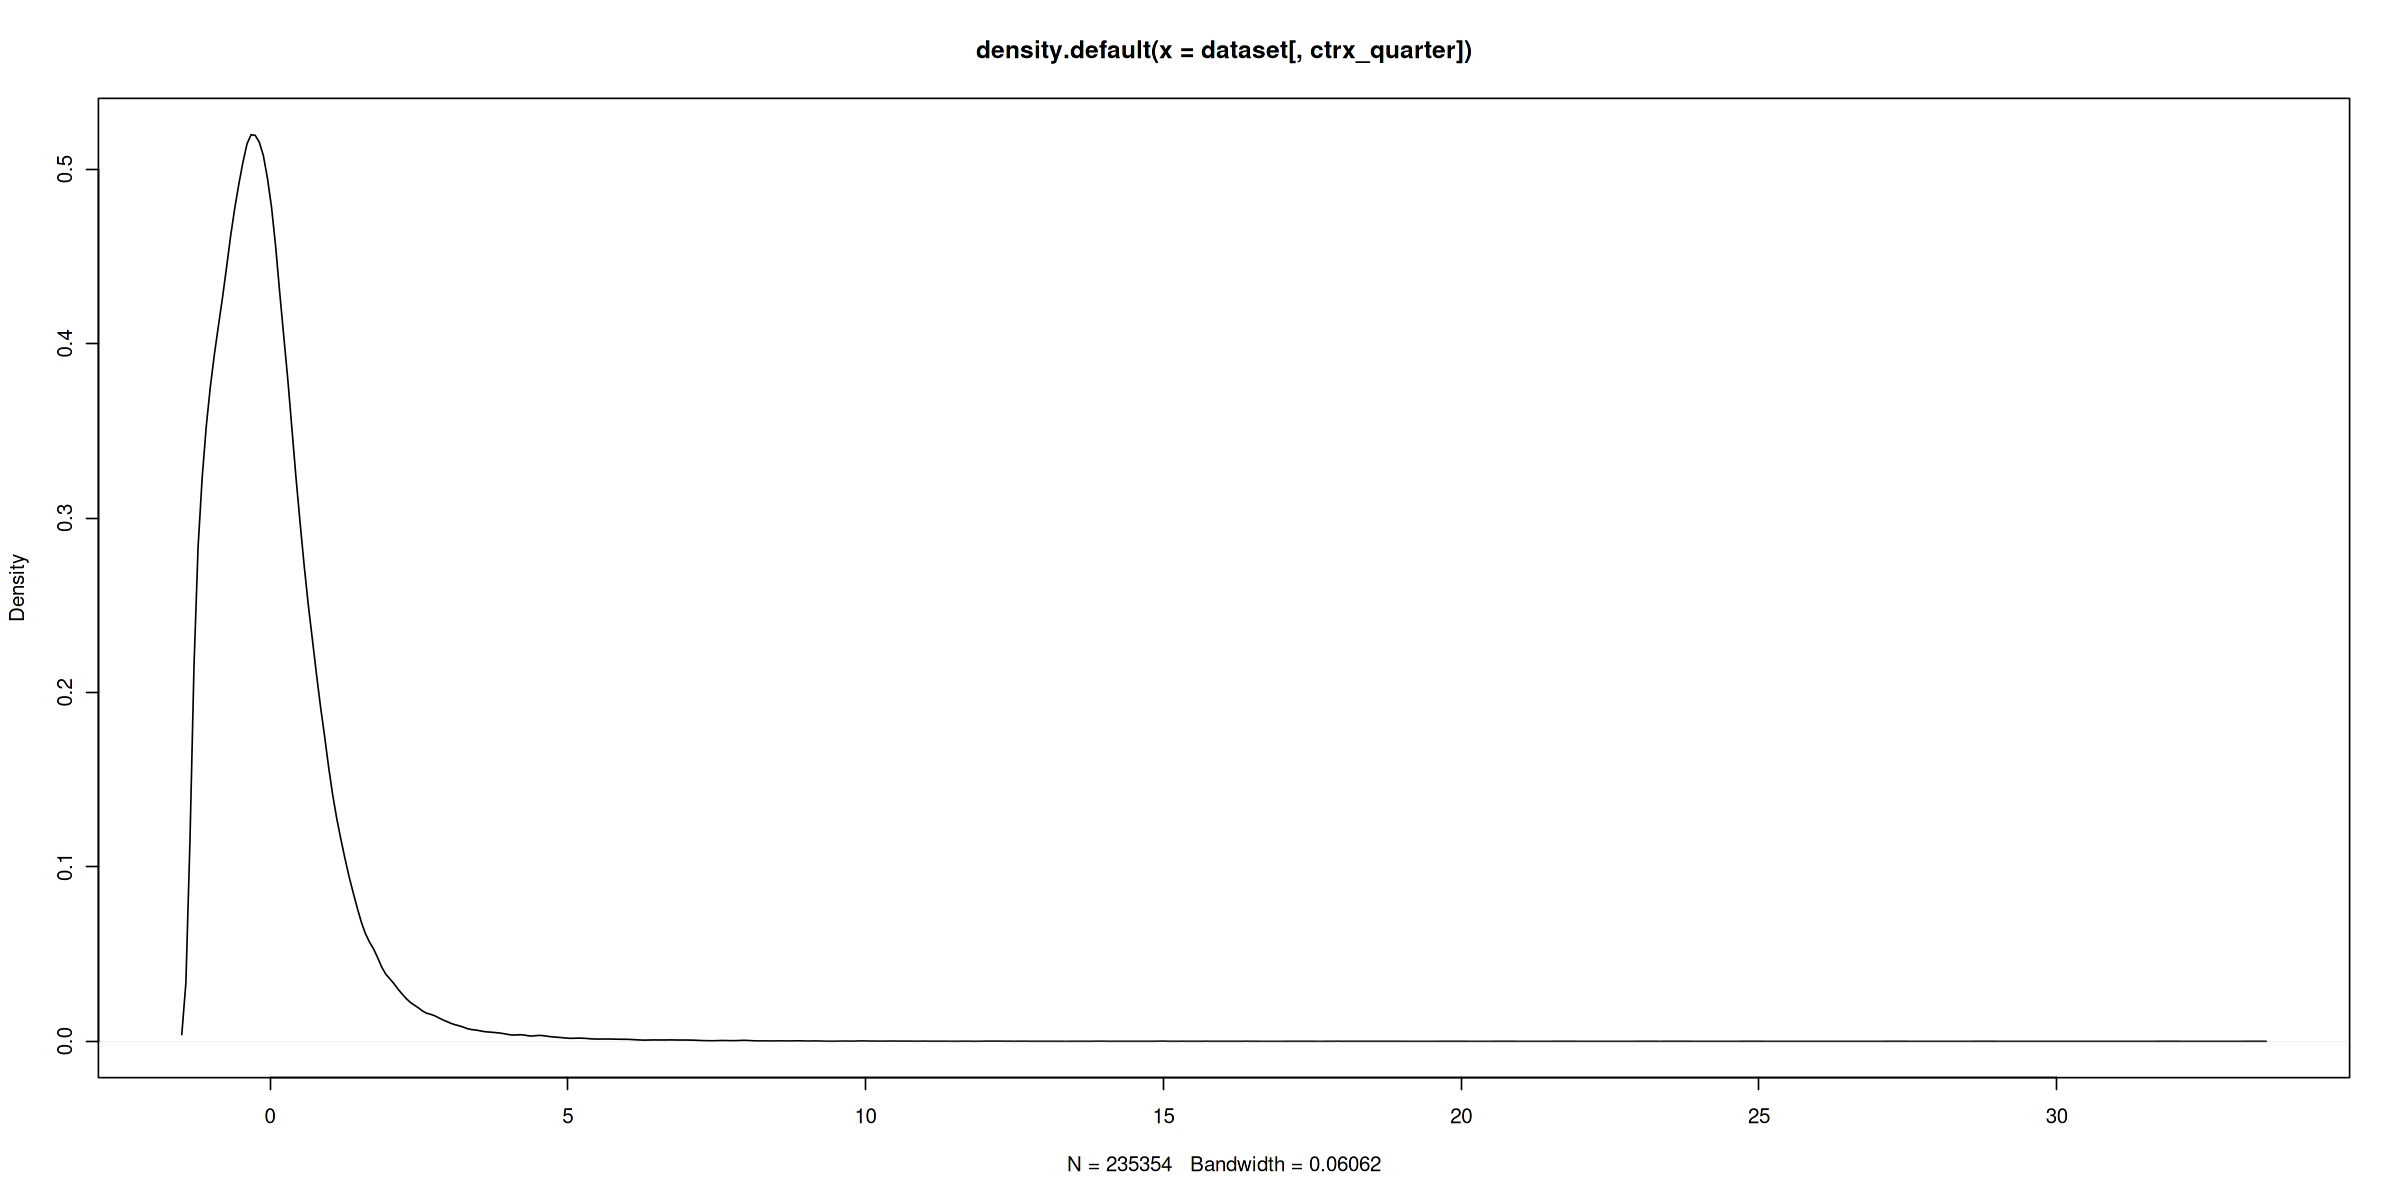

In [19]:
plot( density( dataset[, ctrx_quarter] ) )

Confirmado, la variable está normalizada, ahora corremos nuevamente el arbol de decision

Warning message:
“cex and tweak both specified, applying both”


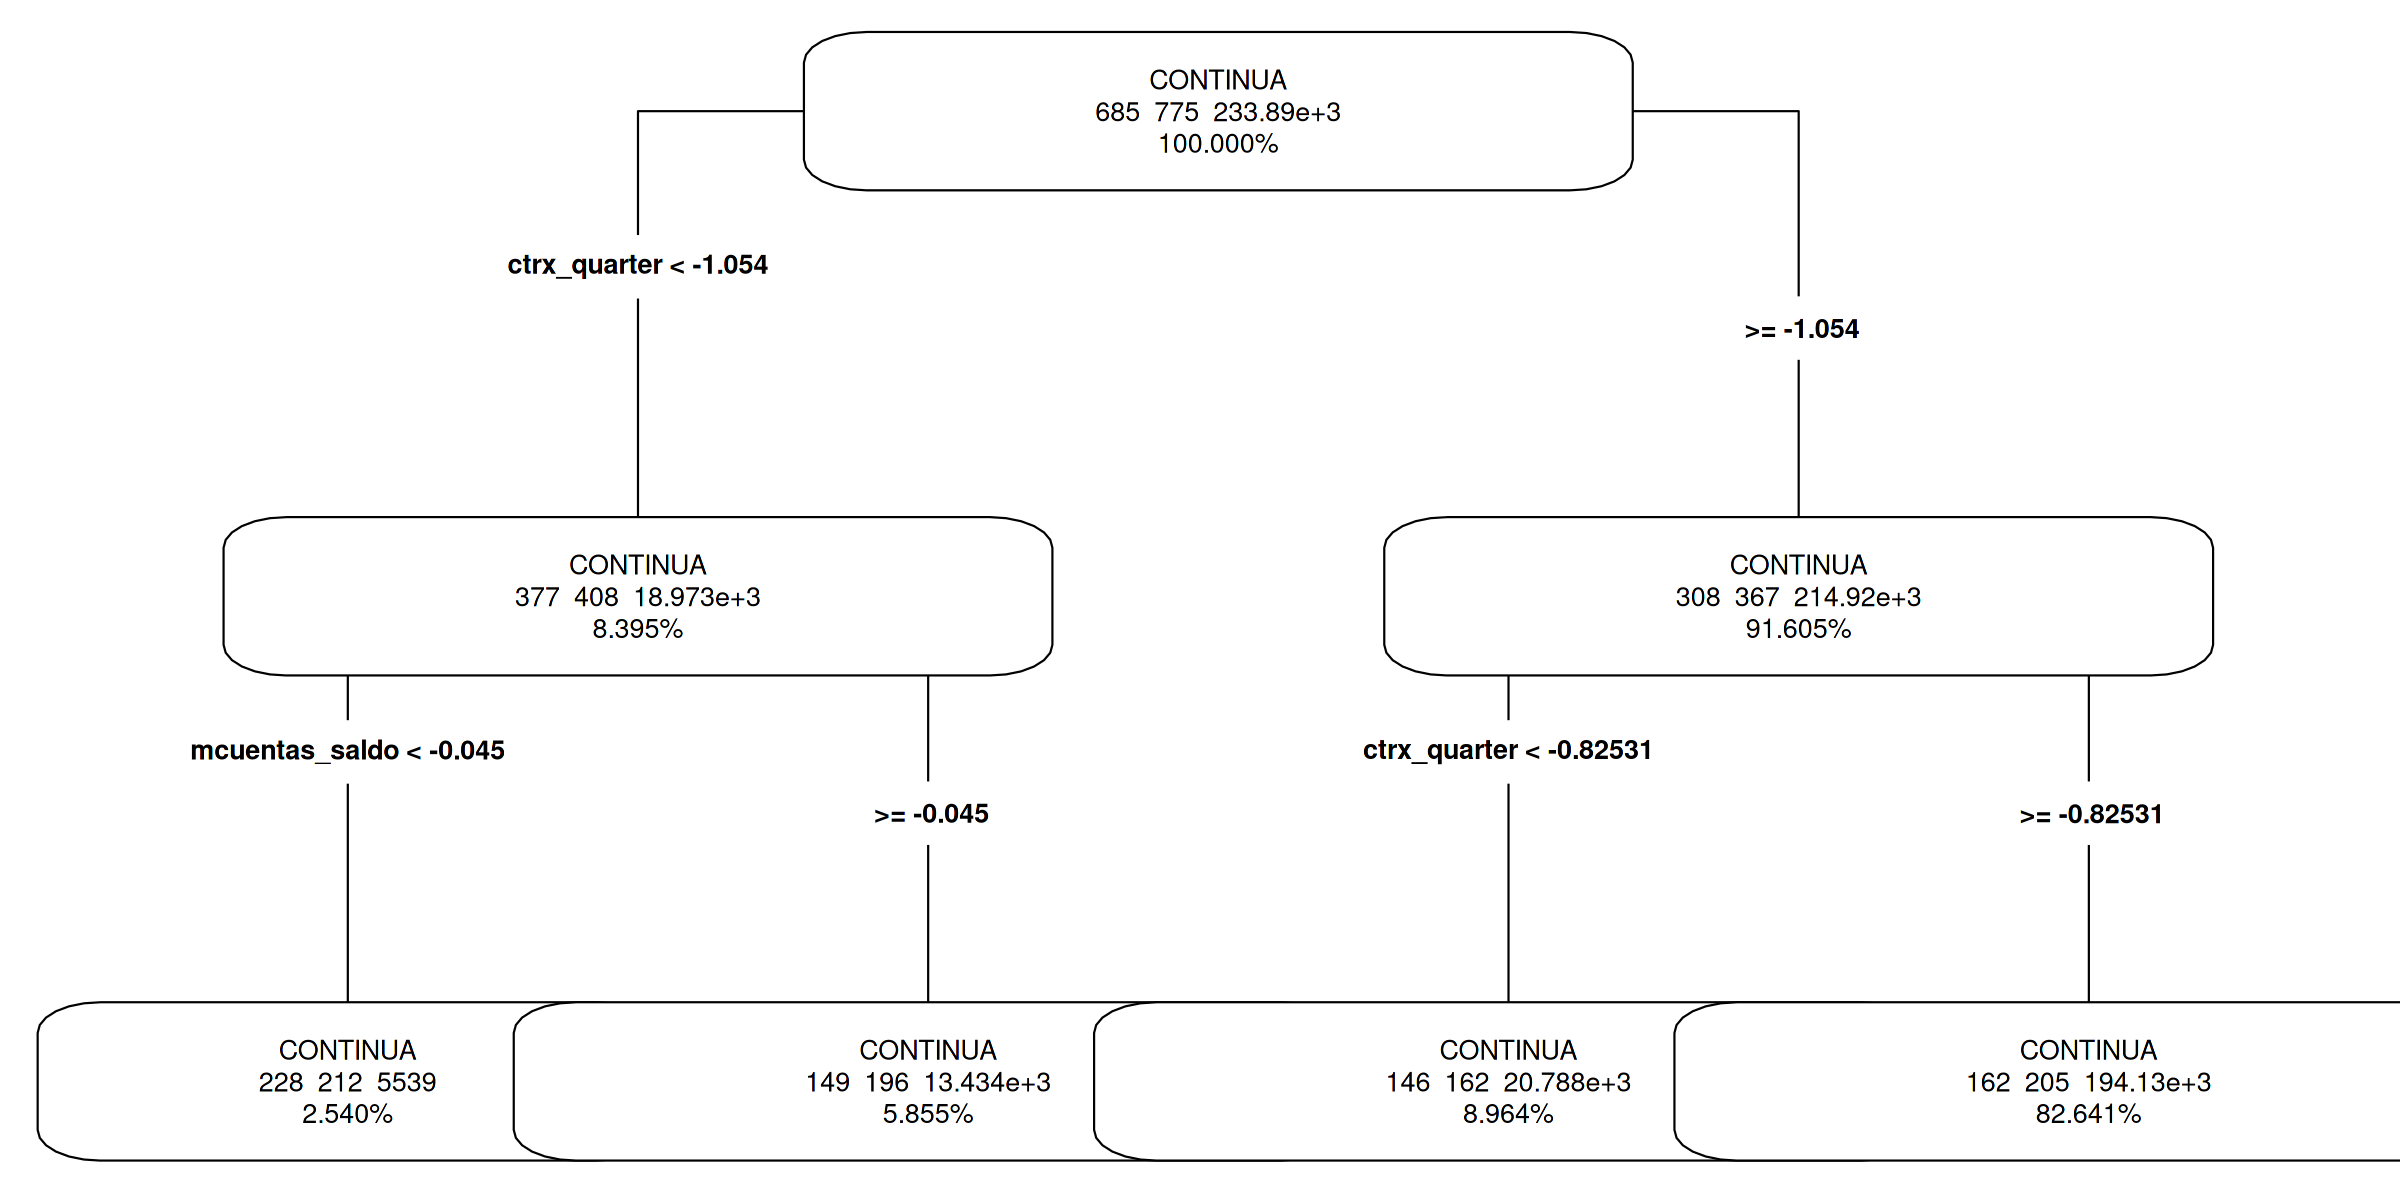

In [20]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las normalizacion de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < -1.0741 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

### Transformación  logaritmica

Primero vuelvo a cargar el dataset

In [21]:
dataset <- fread("./datasetsOri/paquete_premium_202009.csv")   #cargo el dataset

hago la transformación logarítmica

In [22]:
dataset[ , ctrx_quarter :=log(ctrx_quarter+1)]  #sumo el uno poruqe no quiero infinitos

Ahora veo el boxplot

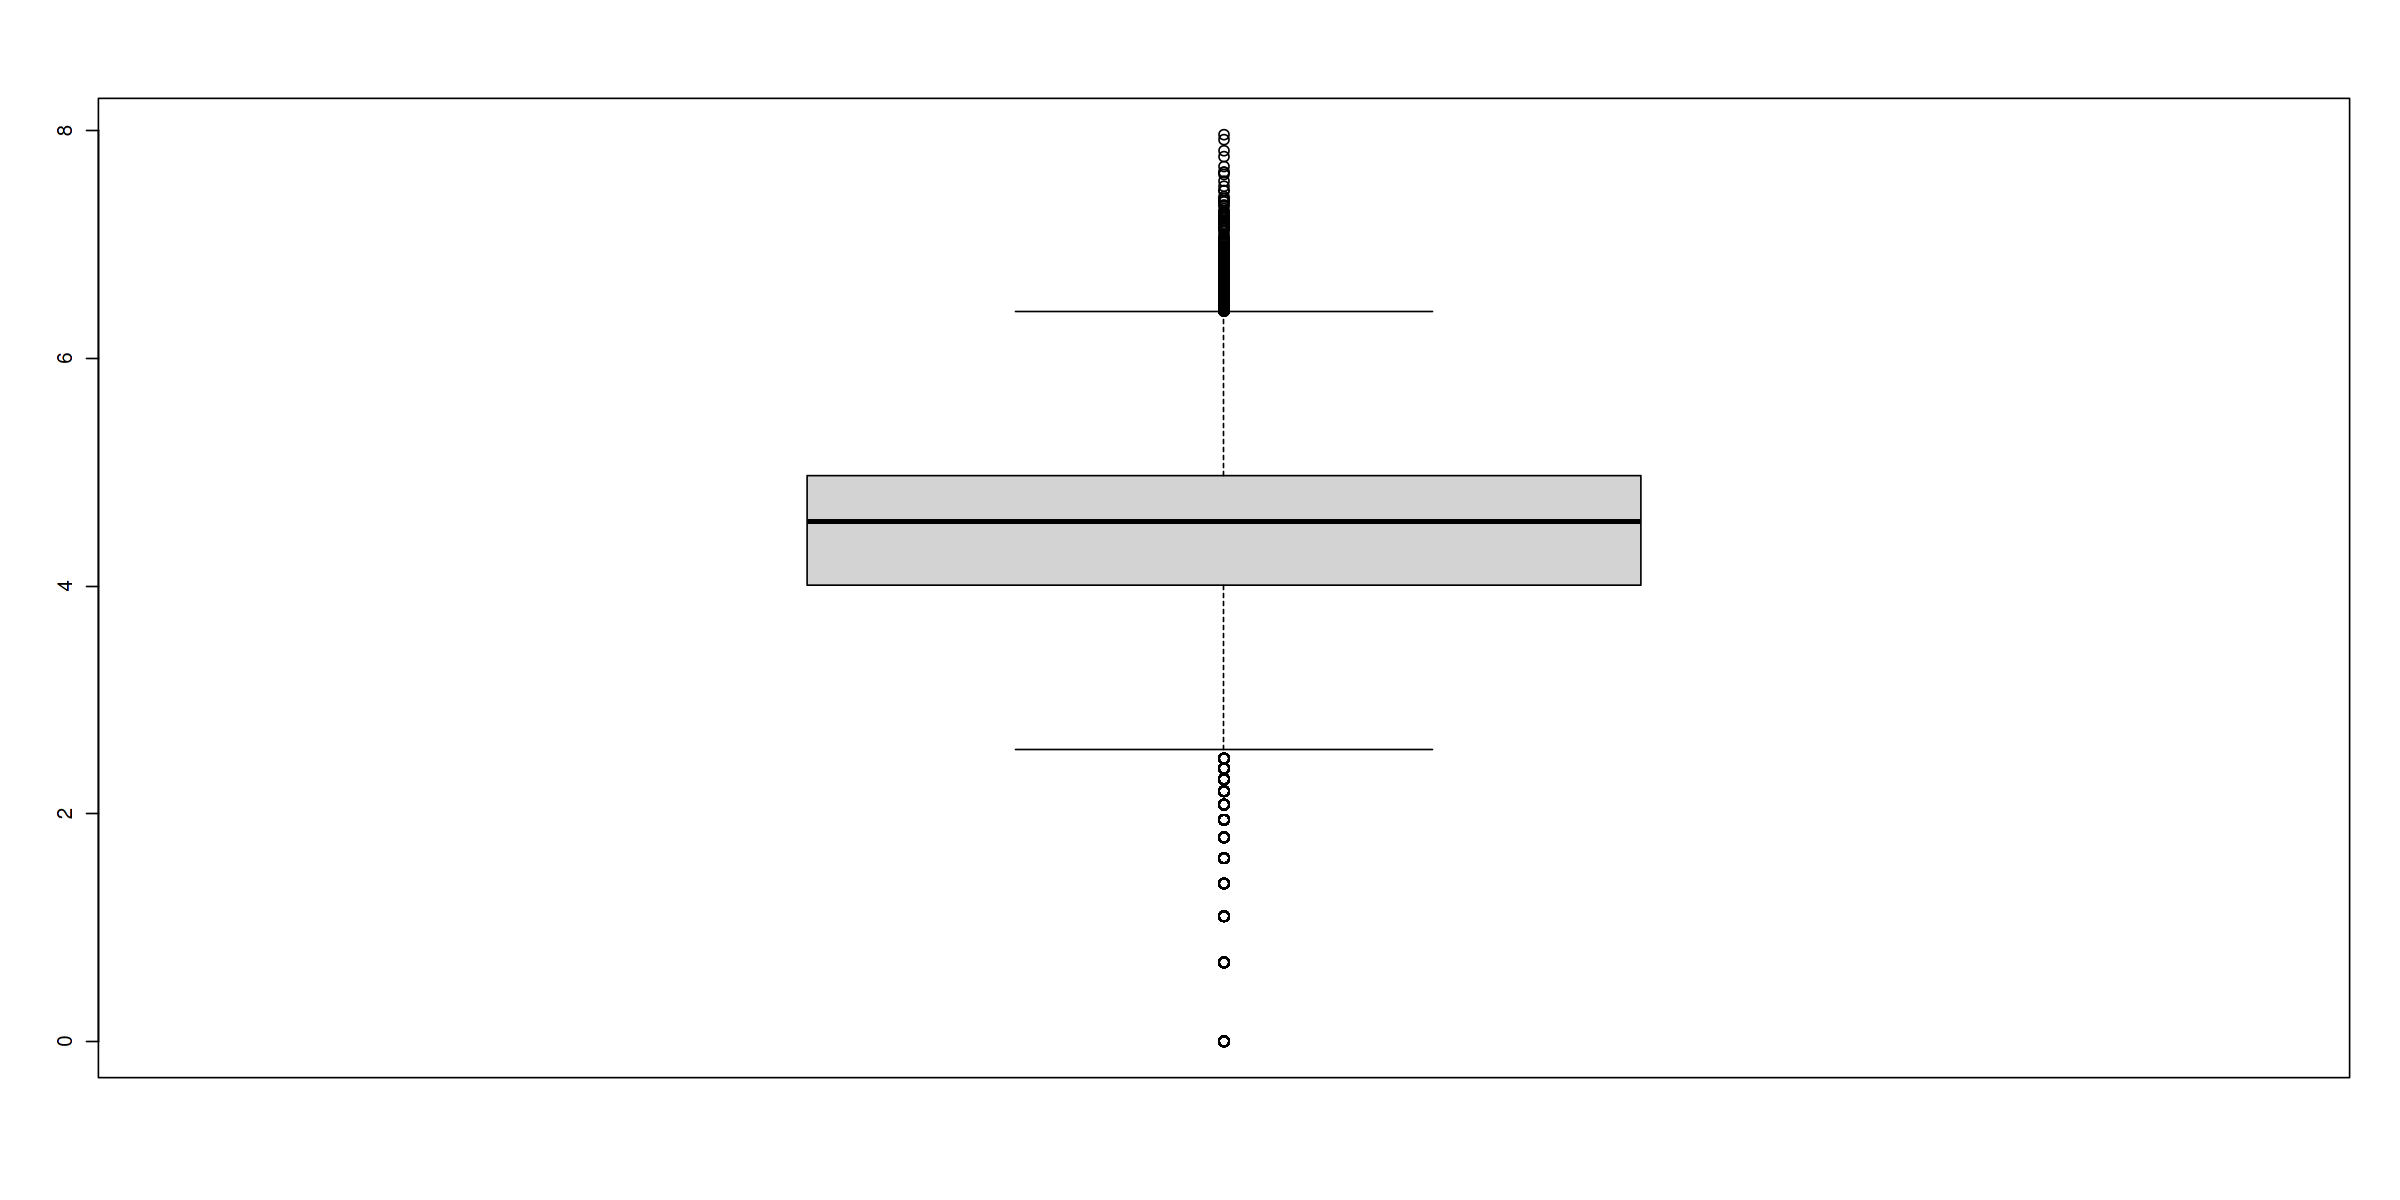

In [23]:
boxplot(  dataset[ , ctrx_quarter])

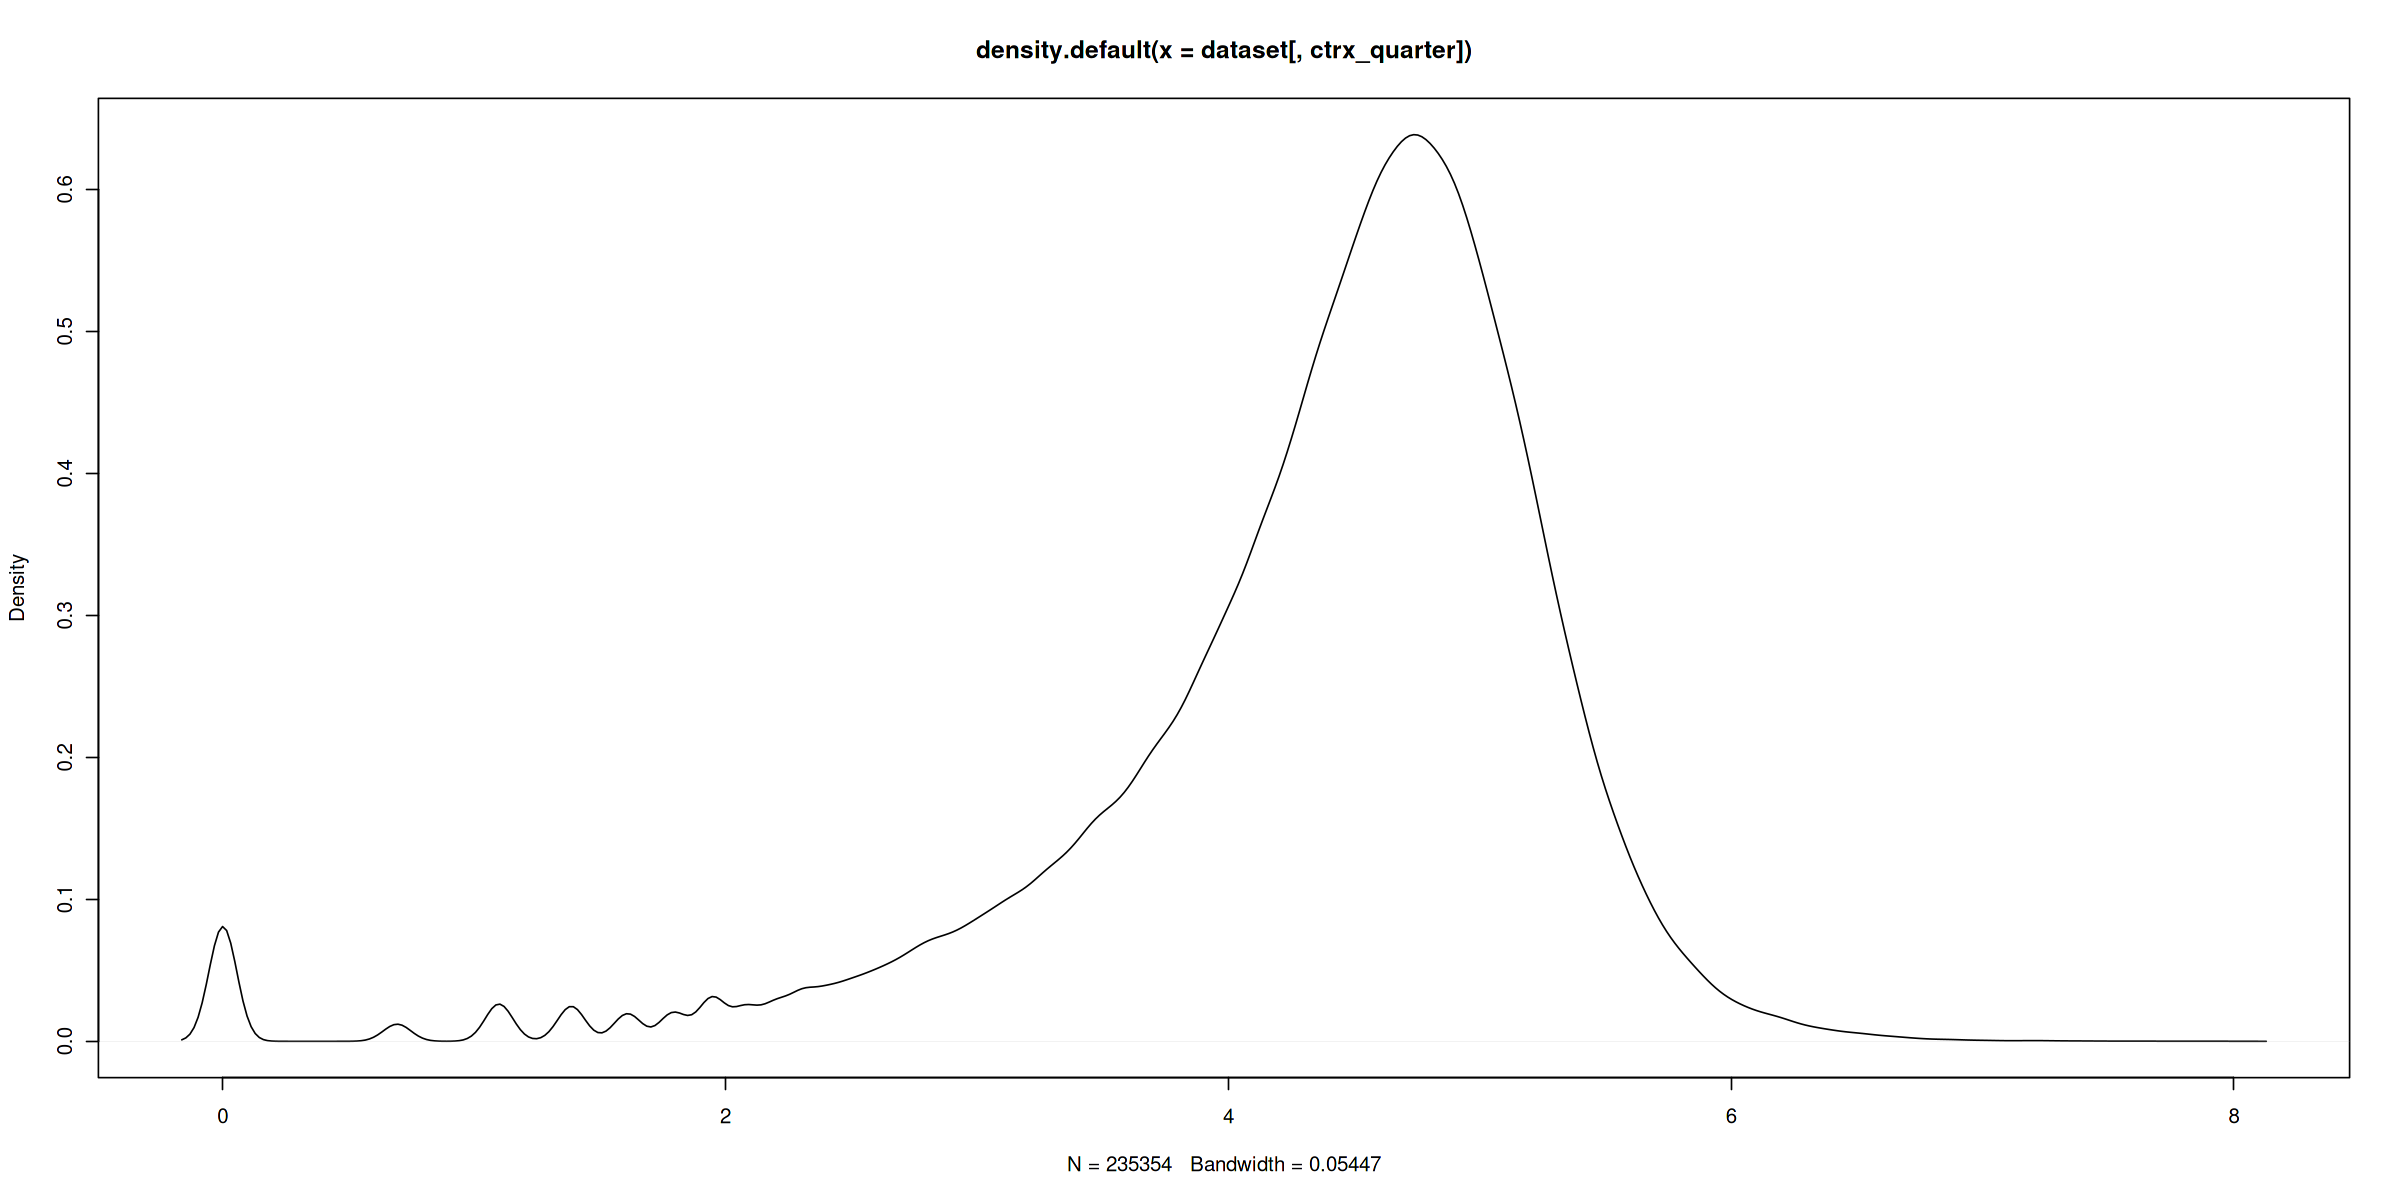

In [24]:
plot( density( dataset[, ctrx_quarter] ) )

Finalmente, el arbol de decision

Warning message:
“cex and tweak both specified, applying both”


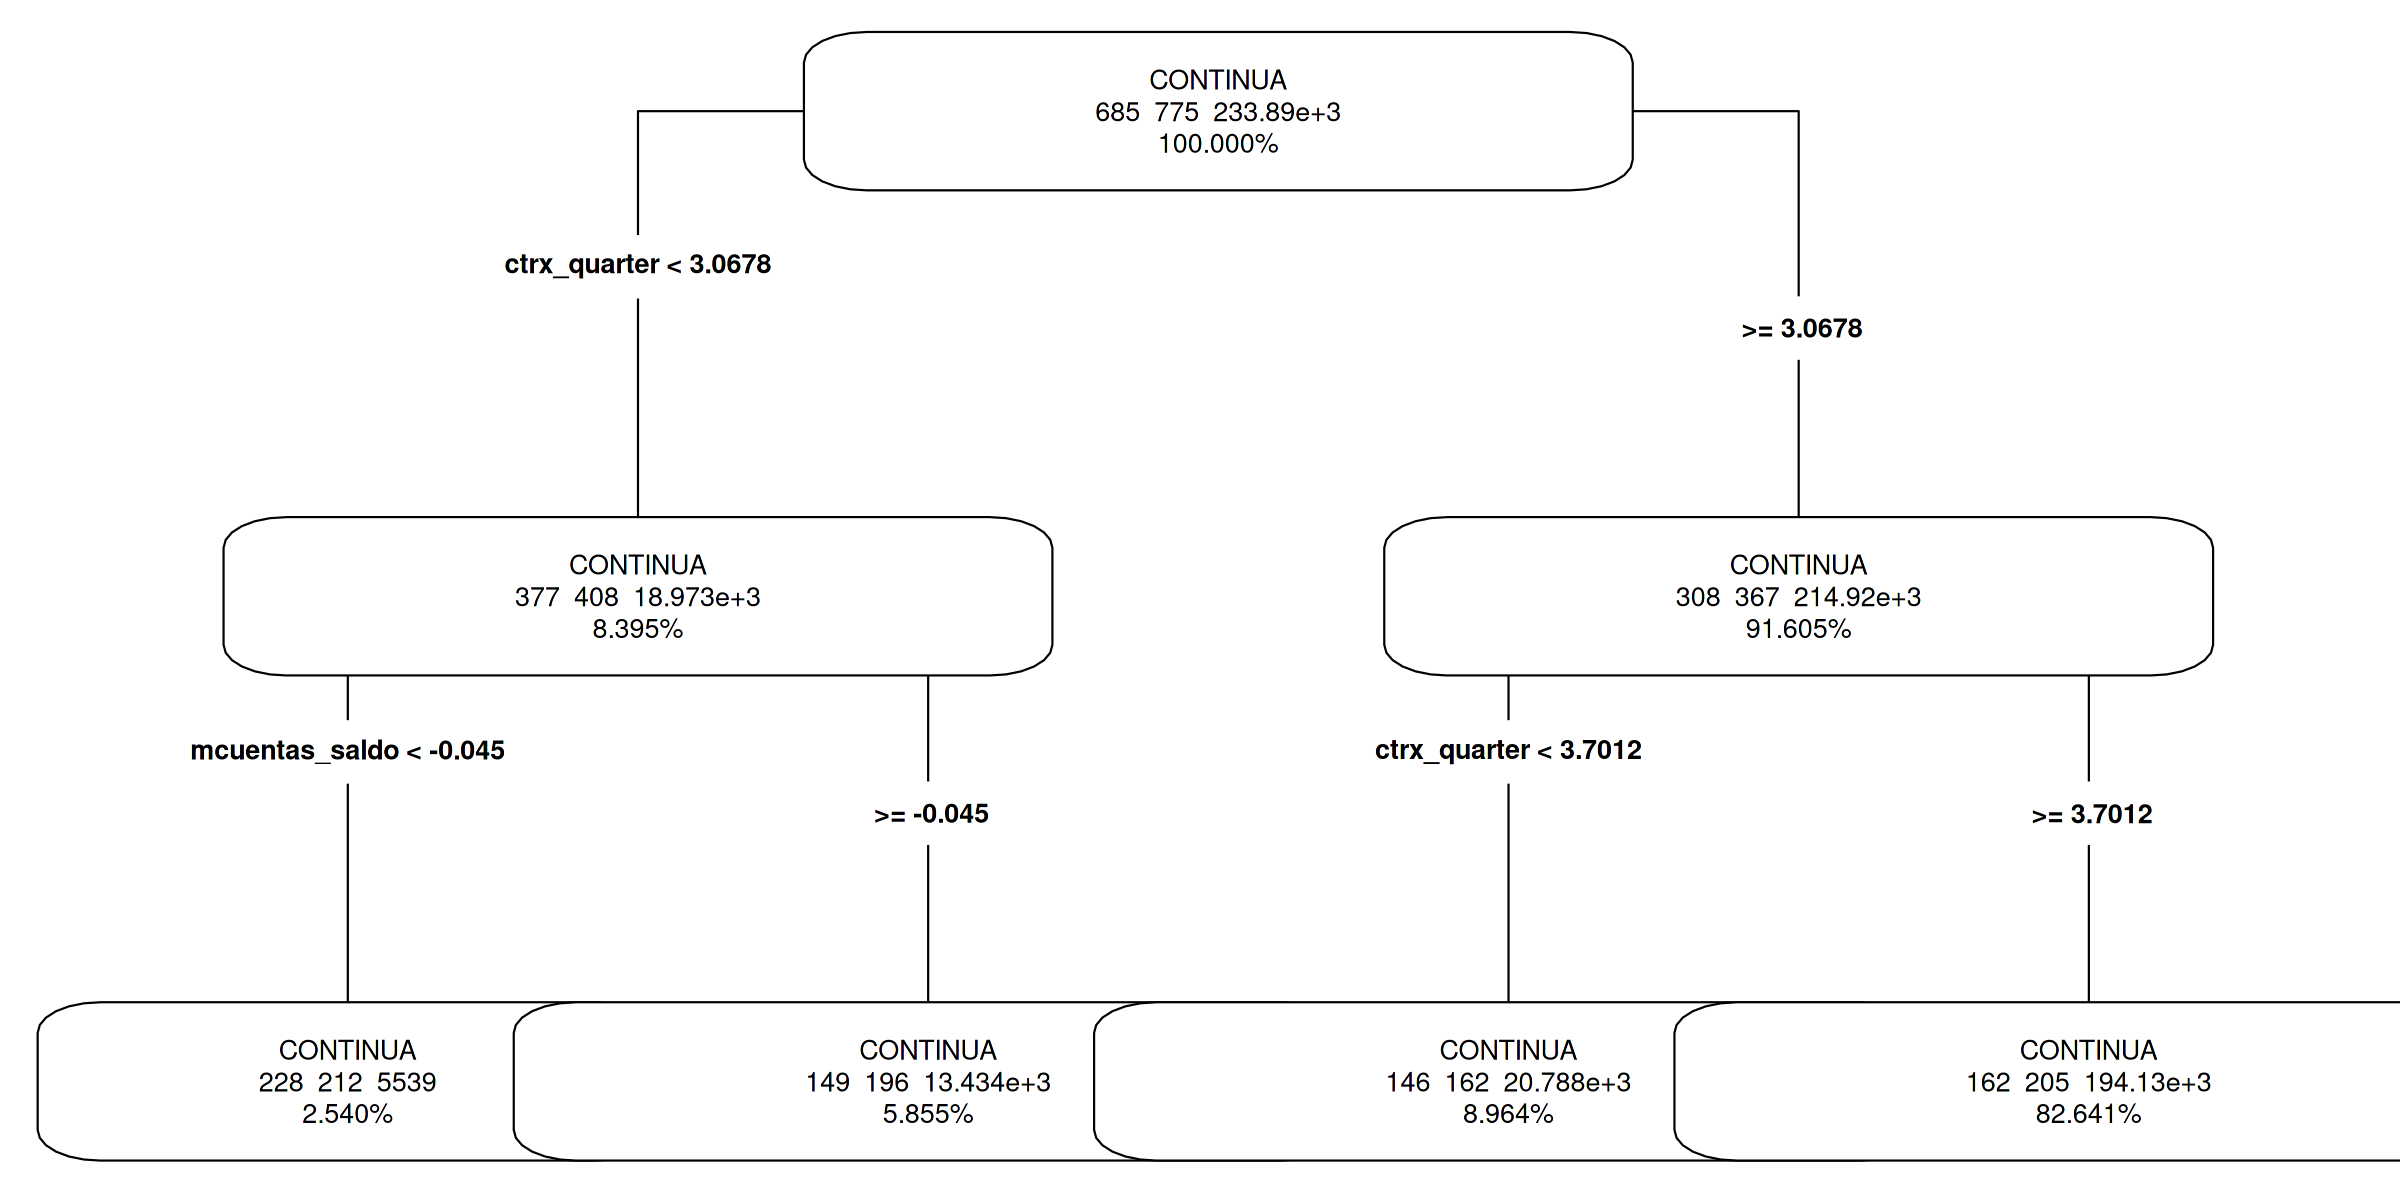

In [25]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a la transformada logaritmica**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < 2.9701 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

### Outliers

Ahora fabrico outliers y veo como se comporta el arbol

Primero vuelvo a cargar el dataset

In [26]:
dataset <- fread("./datasetsOri/paquete_premium_202009.csv")   #cargo el dataset

el boxplot original

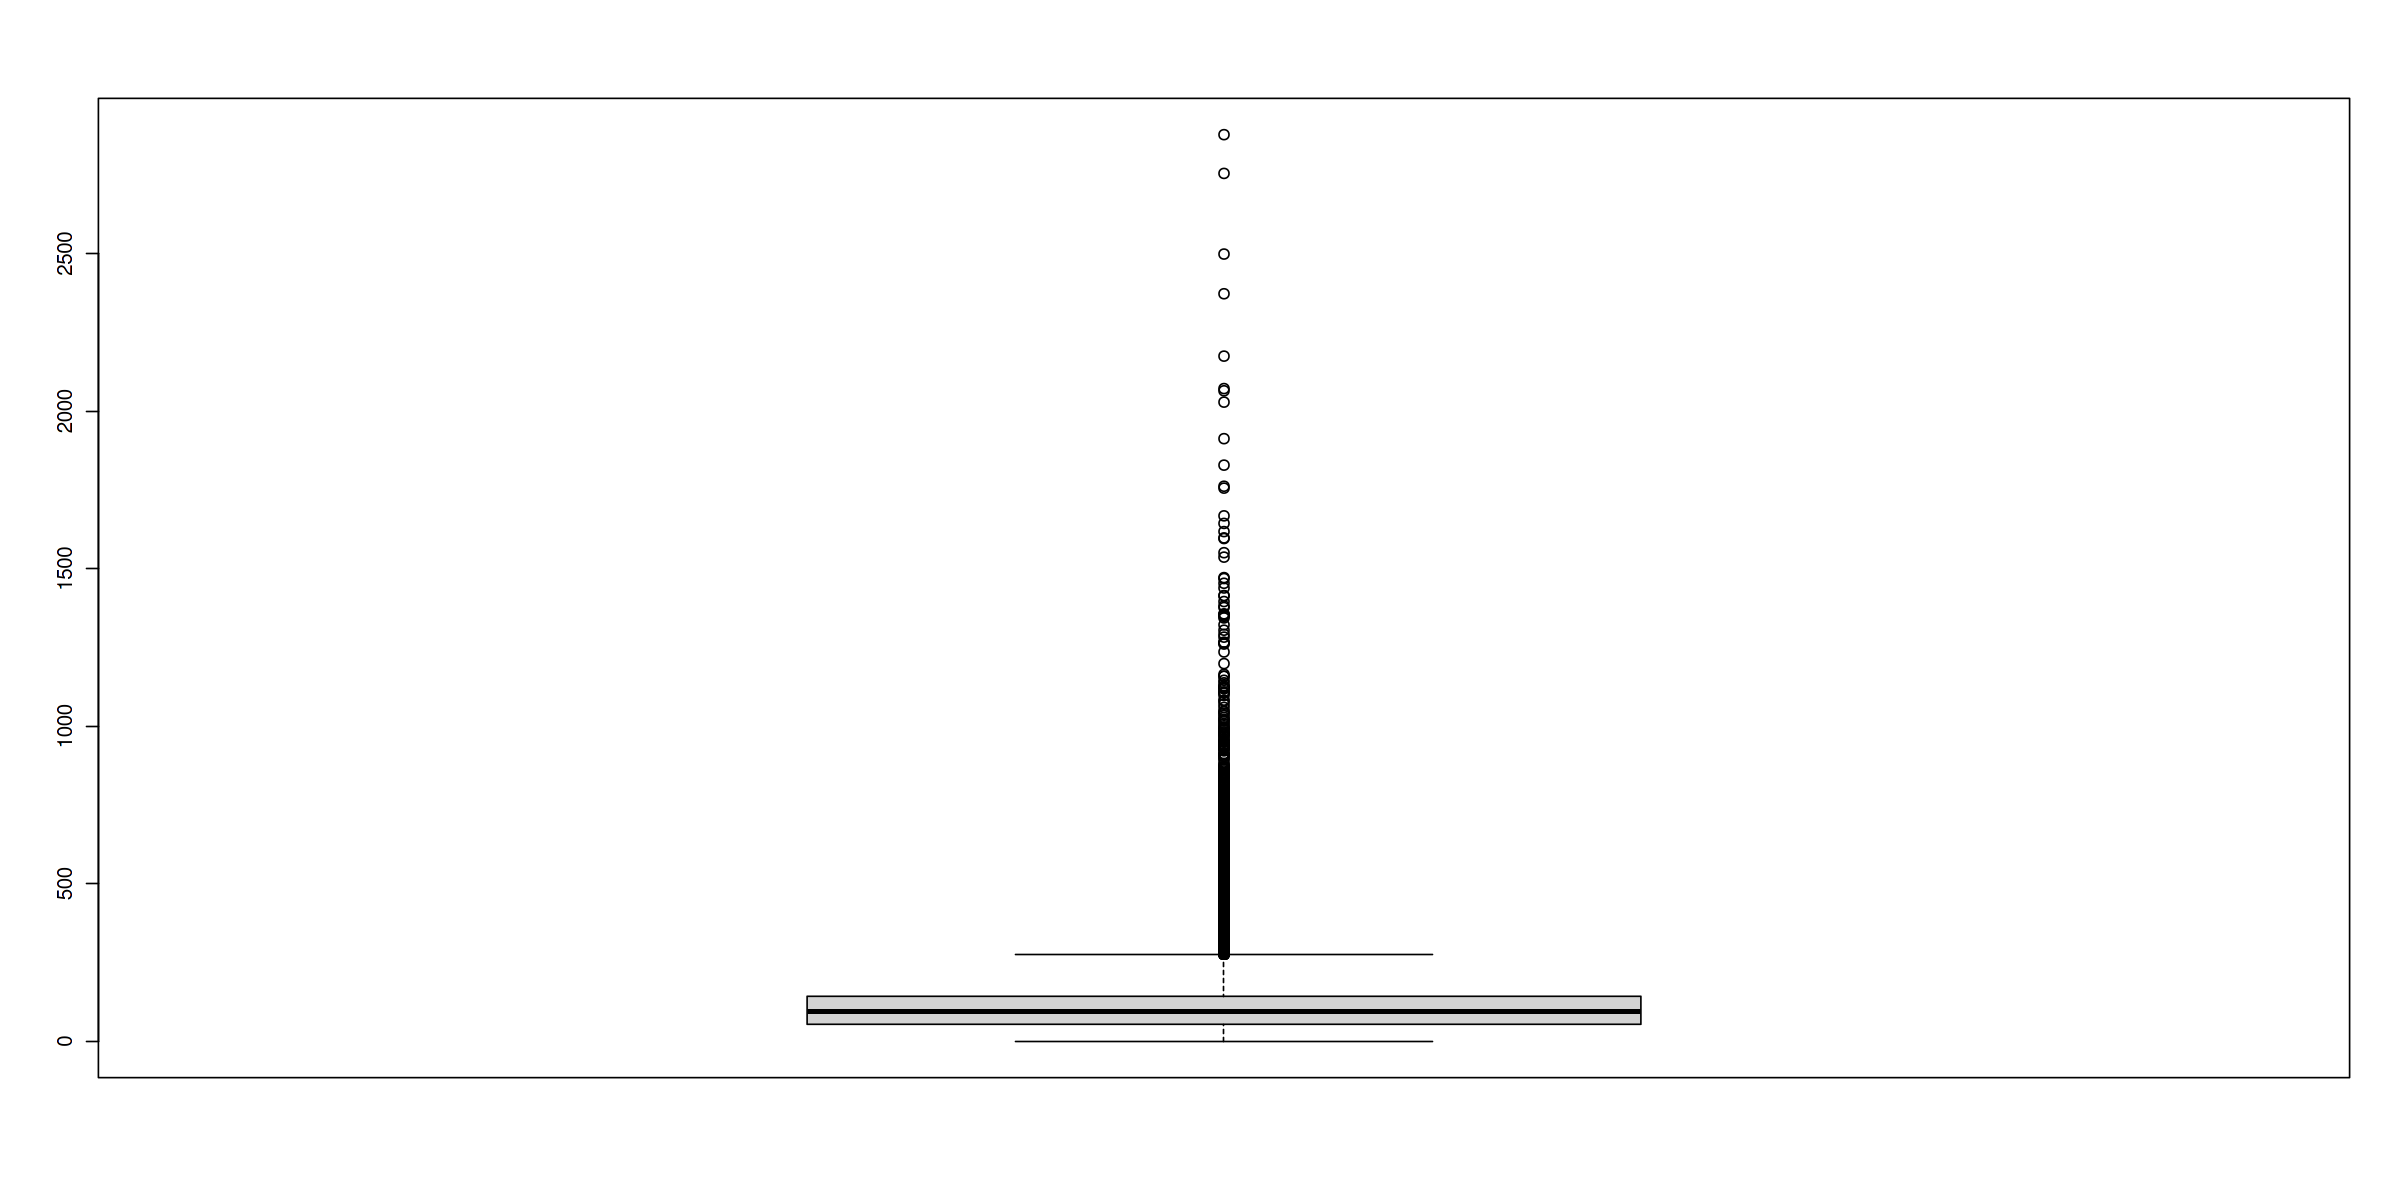

In [27]:
boxplot(  dataset[ , ctrx_quarter])

cuento cuantos registros hay con ctrx_quarter > 1500

In [28]:
dataset[ ctrx_quarter > 1500, .N]

[1] 19

Ahora, a esos 21 valores los transformo en outliers extremos

In [29]:
dataset[ ctrx_quarter > 1500,  ctrx_quarter := ctrx_quarter * 1000]

compruebo que sean outliers extremos

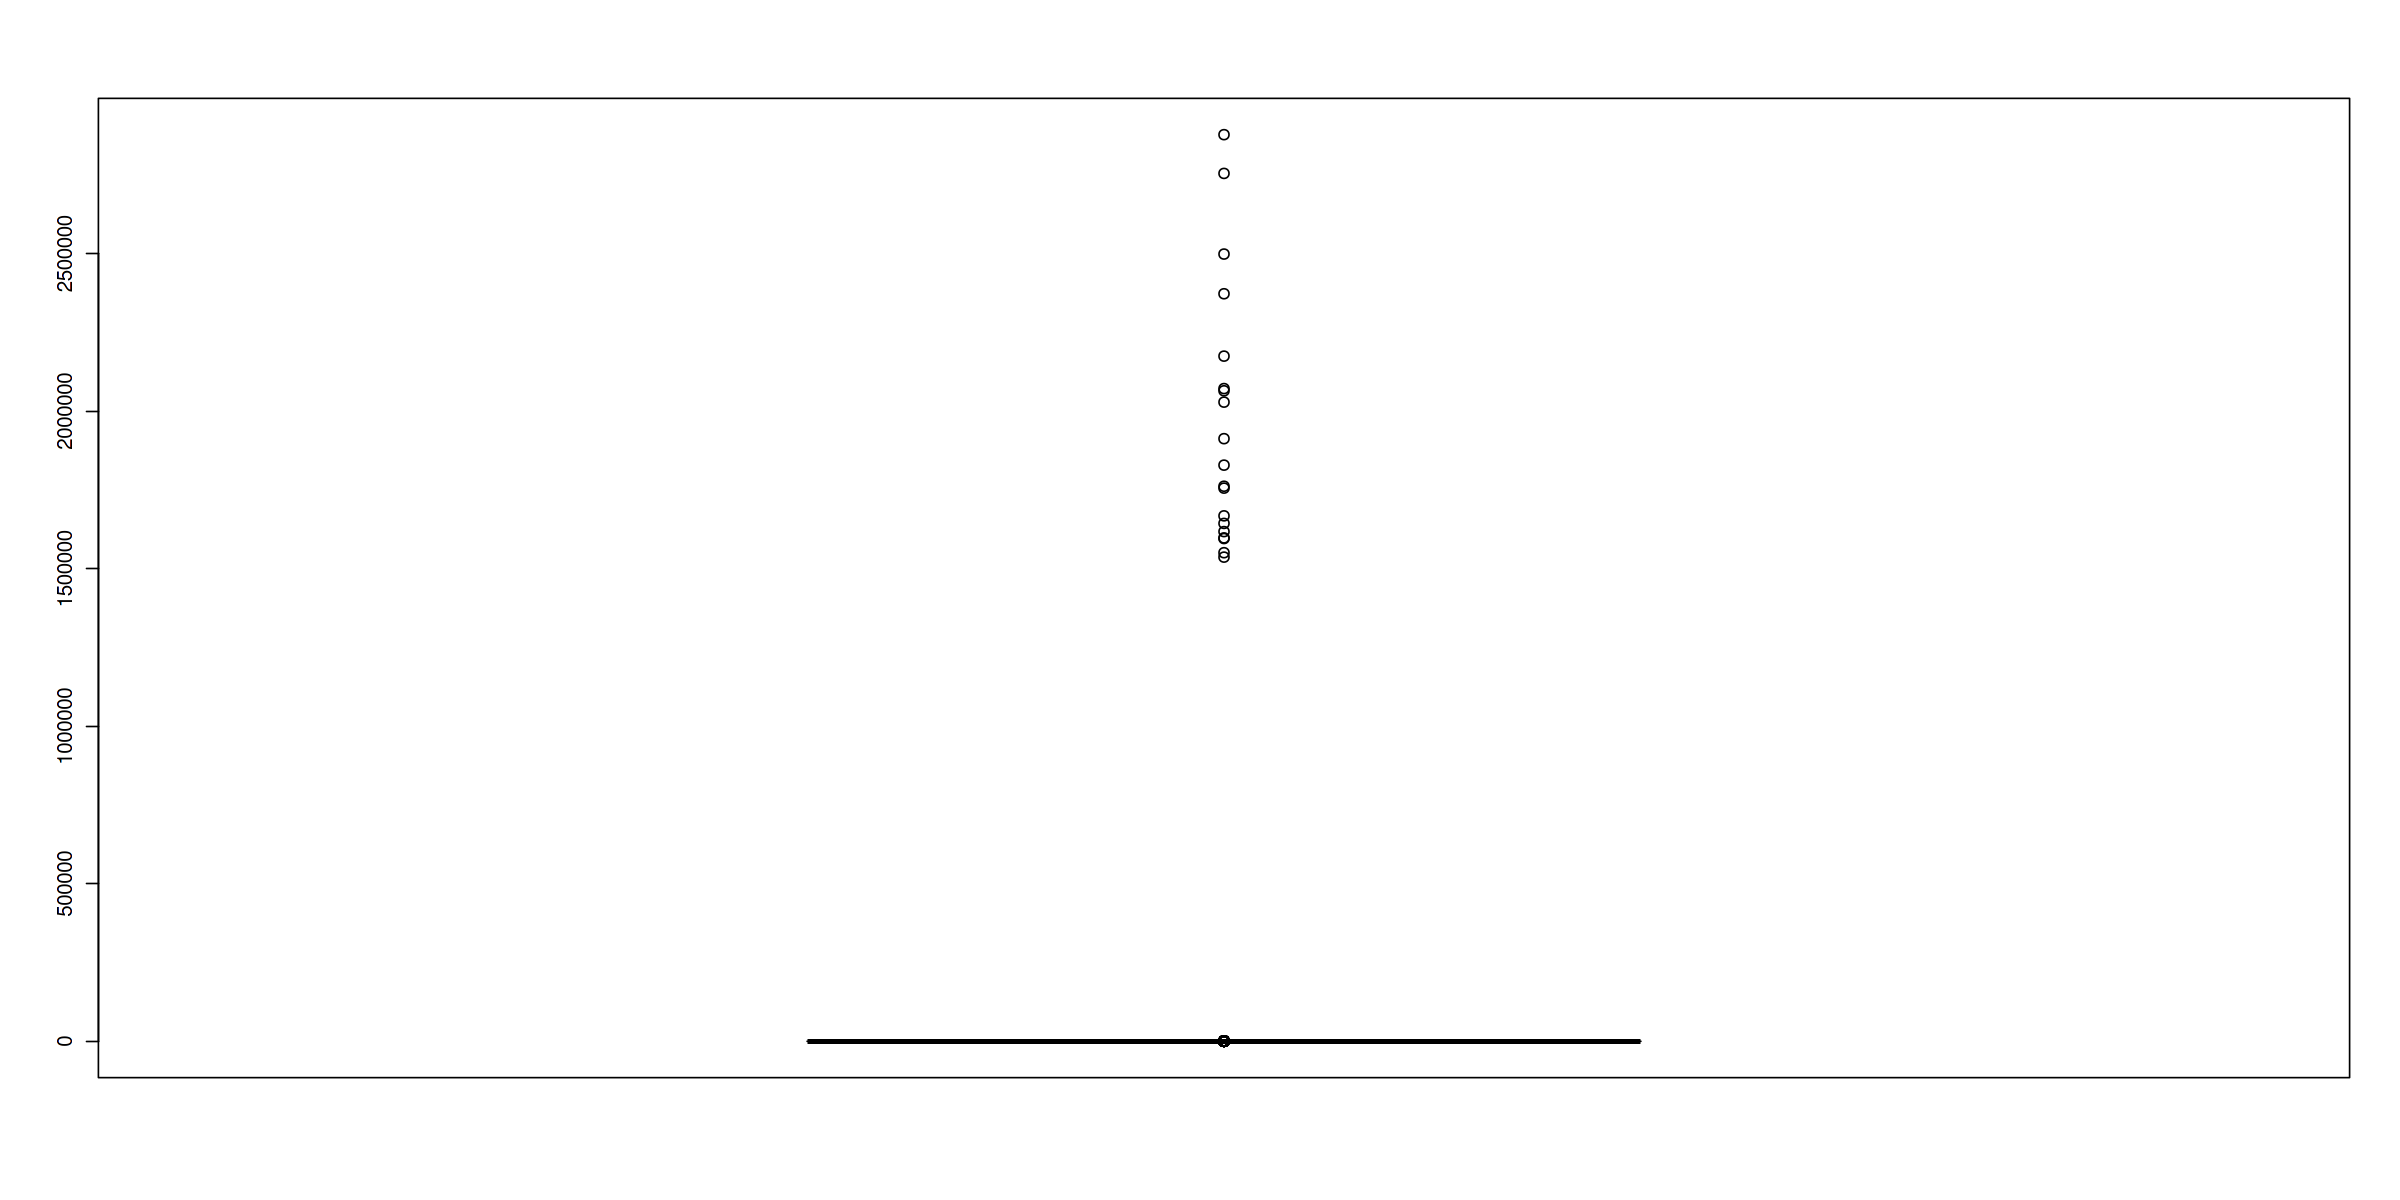

In [30]:
boxplot(  dataset[ , ctrx_quarter])

Finalmente, nuevamente arbol de decision

Warning message:
“cex and tweak both specified, applying both”


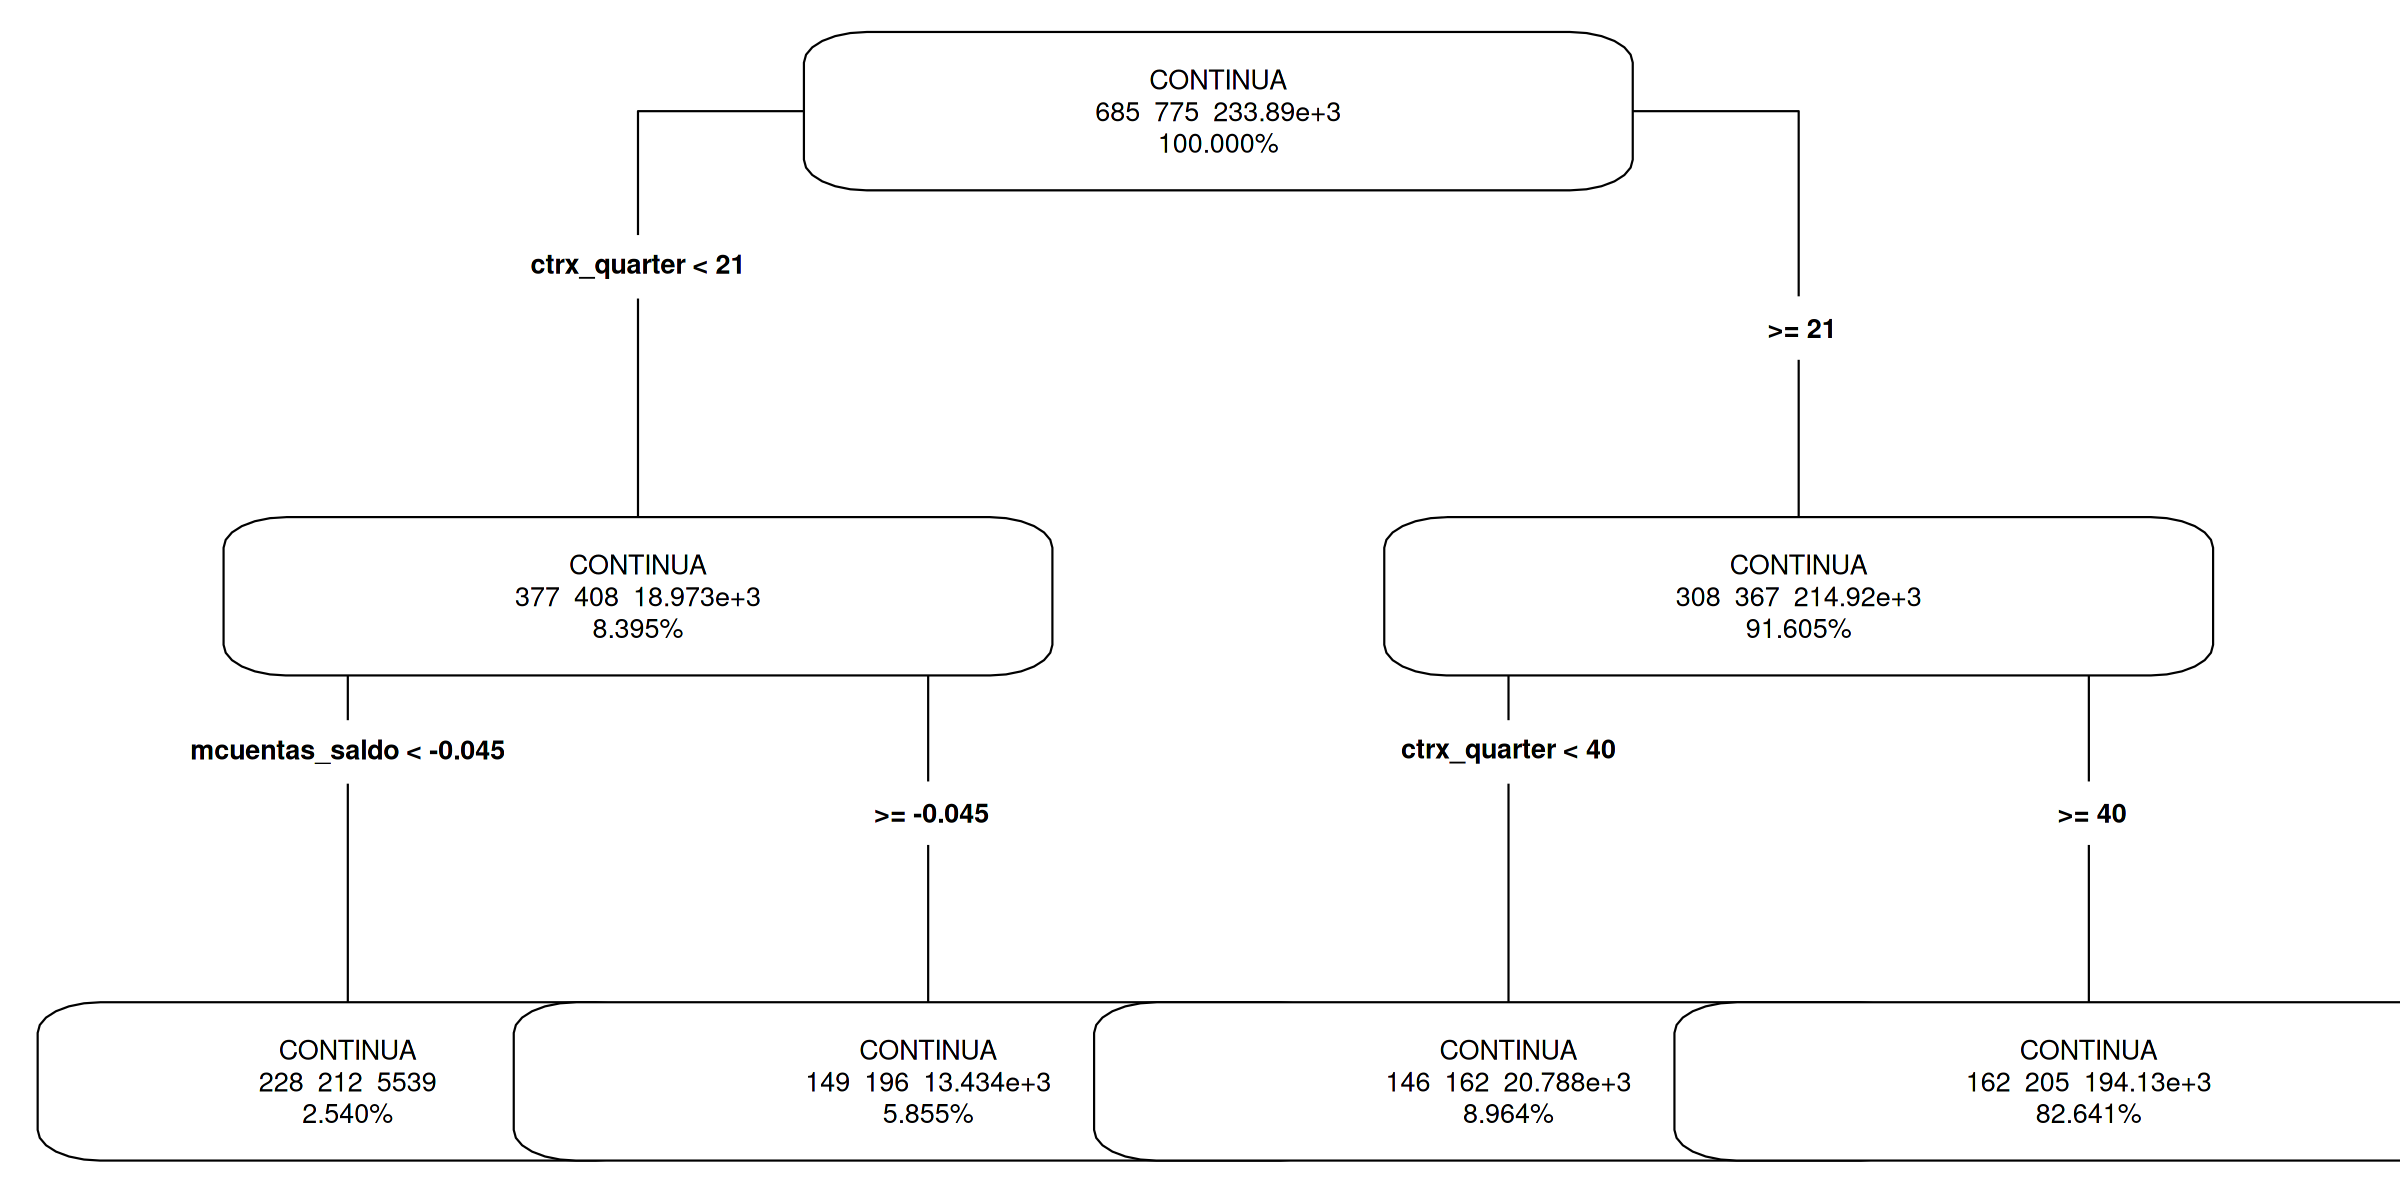

In [31]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE, el arbol de decision es inmune a los outliers**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < 2.9701 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.